<a id="1"></a>
<h1 style="color : white; background-color: blue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;" >
   Data Preprocessing - 2025 - TREATMENT <br>
    
    
</h1>

<a id="1"></a>
<h1 style="color : white; background-color: green ;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 15px 50px;" >
  1. Secutrial Preprocessing <br>
    
    
</h2>

In [42]:
from dstools.importer.main import *
from dstools.utils.regex import find_pattern  
from functools import reduce

path_project = dirs.projects / '2024-Treatment/'
#path_SecuTrial = dirs.ST / 'PRORAD/2024-01-29/data_PRORA_20240129-091419.xlsx'
path_SecuTrial = dirs.ST / 'PRORAD/2025-02-05/data_PRORA_20250203-085339.csv'








#filter_times = ['t0',"t1","t2", "t3","t4"]
filter_times = ['t0',"t1","t2","t3","t4"]
#filter_times = ['t0',"t1"]

auf = FO.Aufnahme()
fw = FO.Fieldwork()
ver = FO.Verlauf()
ST = SecuTrial('mnpaid')
ST.read(path_SecuTrial)
assert not ST.df.mnpaid.duplicated().any()

In [43]:
# some functions
def change_format(DF, key_col, id , exact = True):
    from functools import reduce  
    listdf = []
    for k in key_col:
        
        if exact:
            df = DF.filter(regex = k + '$' + '|aid')
            df = df.melt(id_vars=  id, value_vars = list(DF.filter(regex = k + '$').columns)).sort_values(id)
        else:
            df = DF.filter(regex = k + '|aid')
            df = df.melt(id_vars=  id, value_vars = list(DF.filter(regex = k ).columns)).sort_values(id)

        #df['visit'] = df['variable'].str[:2].str.upper()
        df['visit'] = df['variable'].str.split("_", n = 1, expand = True)[0].str.upper()
        del df["variable"]
        #df.rename(columns = {"value" : f"value_{k}"}, inplace=True)
        df.rename(columns = {"value" : k}, inplace=True)
        df.sort_values([id,"visit"], inplace = True)
        df.drop_duplicates(subset=[id,"visit"],inplace=True)
        listdf.append(df)
        df = []  
    return(reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid',"visit"], how='outer'), listdf))


def replace_substr_colnames(df,rename_list):
    for w, i in rename_list.items():   
        df.columns =  df.columns.map(lambda col: col.replace(w,i))
    return(df)

In [44]:
ST.translate_vars(vars_dict)
FE = FeaturesSecuTrial(ST)
FE.extract_location_from_hospital('ctrid')

likely wrong location var specified


In [45]:
ST.df.filter(regex = "ige_gesamt")

,t0_fw_ige_gesamt,t1_fw_ige_gesamt,t2_fw_ige_gesamt,t3_fw_ige_gesamt,t4_fw_ige_gesamt,__t5_fw_ige_gesamt,__t6_fw_ige_gesamt,t01_fw_ige_gesamt,t02_fw_ige_gesamt,__t03_fw_ige_gesamt,__T04_fw_ige_gesamt
0,10.3000000000,1958.0000000000,990.0000000000,1160.0000000000,1527.0000000000,NaN,NaN,NaN,NaN,NaN,NaN
1,17200.0000000000,13905.0000000000,16525.0000000000,15393.0000000000,26304.0000000000,NaN,NaN,NaN,NaN,NaN,NaN
2,6130.0000000000,-6.0000000000,4727.0000000000,4808.0000000000,4943.0000000000,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2164.0000000000,NaN,NaN,NaN,NaN,NaN
4,1960.0000000000,1059.0000000000,547.0000000000,388.0000000000,414.0000000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ST.df.columns = list(ST.df.columns.str.lstrip('_'))
FE.df.columns = list(FE.df.columns.str.lstrip('_'))

**Patient INFO**

In [47]:
ST.df.shape

(2711, 7802)

In [48]:
# drop missing values in untersuchdat
#ST.df.dropna(subset=['t0_fw_untersuchdat', 't0_auf_gebj_1', 't0_auf_gebm_1'], inplace = True)
#FE.extract_date('t0_fw_untersuchdat')
#FE.extract_date('t1_fw_untersuchdat')
#FE.extract_date('t2_fw_untersuchdat')
#FE.extract_date('t3_fw_untersuchdat')
#FE.extract_date('t4_fw_untersuchdat')



for j in filter_times:
    FE.compute_BMI(weight = f'{j}_fw_kunt_weight', height = f'{j}_fw_kunt_size', time_point= j)
    FE.extract_date(f'{j}_fw_untersuchdat')  
    FE.reformat_date(f'{j}_fw_medbeg_1')
    FE.reformat_date(f'{j}_fw_medbeg_2')
    FE.reformat_date(f'{j}_fw_medbeg_3')  
    FE.reformat_date(f'{j}_fw_medbeg_4')
    FE.reformat_date(f'{j}_fw_medbeg_5')
    FE.reformat_date(f'{j}_fw_medbeg_6')
    FE.reformat_date(f'{j}_fw_medbeg_7')
    FE.reformat_date(f'{j}_fw_medbeg_8')
    FE.reformat_date(f'{j}_fw_medbeg_9')
    FE.reformat_date(f'{j}_fw_medlanw_1')
    FE.reformat_date(f'{j}_fw_medlanw_2')
    FE.reformat_date(f'{j}_fw_medlanw_3')
    FE.reformat_date(f'{j}_fw_medlanw_4')
    FE.reformat_date(f'{j}_fw_medlanw_5')
    FE.reformat_date(f'{j}_fw_medlanw_6')
    FE.reformat_date(f'{j}_fw_medlanw_7')
    FE.reformat_date(f'{j}_fw_medlanw_8')
    FE.reformat_date(f'{j}_fw_medlanw_9')
    FE.reformat_date(f'{j}_fw_untersuchdat')

    #FE.extract_date(f'{j}_fw_medbeg_1')
    #FE.extract_date(f'{j}_fw_medbeg_2')
    #FE.extract_date(f'{j}_fw_medbeg_3')
    #FE.extract_date(f'{j}_fw_medbeg_4')
    #FE.extract_date(f'{j}_fw_medbeg_5')
    #FE.extract_date(f'{j}_fw_medbeg_6')
    #FE.extract_date(f'{j}_fw_medbeg_7')
    #FE.extract_date(f'{j}_fw_medbeg_8')
    #FE.extract_date(f'{j}_fw_medbeg_9')
    #FE.extract_date(f'{j}_fw_medlanw_1')
    #FE.extract_date(f'{j}_fw_medlanw_2')
    #FE.extract_date(f'{j}_fw_medlanw_3')
    #FE.extract_date(f'{j}_fw_medlanw_4')
    #FE.extract_date(f'{j}_fw_medlanw_5')
    #FE.extract_date(f'{j}_fw_medlanw_6')
    #FE.extract_date(f'{j}_fw_medlanw_7')
    #FE.extract_date(f'{j}_fw_medlanw_8')
    #FE.extract_date(f'{j}_fw_medlanw_9')






    
DC = DataCorrector(FE)
DC.correct_years(['t0_fw_untersuchdat_year', 't0_auf_gebj_1'])
DC.correct_months(['t0_fw_untersuchdat_month', 't0_auf_gebm_1'])


FE.df = DC.df
FE.compute_patient_age(exam_year = 't0_fw_untersuchdat_year' , 
                       exam_month = 't0_fw_untersuchdat_month', 
                       born_year = 't0_auf_gebj_1',
                       born_month = 't0_auf_gebm_1')


FE.df["t0_fw_anamadbeg_mon"] = np.where(FE.df["t0_fw_anamadbeg_mon"]<0, 0, FE.df["t0_fw_anamadbeg_mon"])

FE.compute_age_AD_onset(start_year = 't0_fw_anamadbeg_jahr' , 
                       start_month = 't0_fw_anamadbeg_mon', 
                       born_year = 't0_auf_gebj_1',
                       born_month = 't0_auf_gebm_1')


#FE.df["t0_fw_anamadbeg_jahr"].value_counts()
FE.df["t0_age_AD_onset"] = np.where(FE.df["t0_fw_anamadbeg_jahr"]<1930, "NaN", FE.df["t0_age_AD_onset"])



FE.df["t0_fw_scorad_v_tot"] = np.where(FE.df["t0_fw_scorad_v_tot"] >52.5, "NaN", FE.df["t0_fw_scorad_v_tot"])
FE.df["t0_fw_scorad_v_tot"] = FE.df["t0_fw_scorad_v_tot"].astype(float)
FE.df["t0_fw_scorad_h_tot"] = np.where(FE.df["t0_fw_scorad_h_tot"] >51.5, "NaN", FE.df["t0_fw_scorad_v_tot"])
FE.df["t0_fw_scorad_h_tot"] = FE.df["t0_fw_scorad_h_tot"].astype(float)
FE.df["t0_affected_body_surface_area"] = 100*(FE.df["t0_fw_scorad_v_tot"]+FE.df["t0_fw_scorad_h_tot"])/104
FE.df['t0_AD_selfdeclared'] = FE.df[['t0_auf_aesatus_311']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_uv_therapy_12months'] = FE.df[['t0_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_basic_therapy'] = FE.df[['t0_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_local_therapy_12months'] = FE.df.filter(regex = "t0_auf_thraelok").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_sys_therapy_12months'] = FE.df.filter(regex = "t0.*_3174").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df["t0_days_missing"] = np.where(FE.df.t0_auf_fehlenae_56 < 0, "NaN", FE.df.t0_auf_fehlenae_56)

C:\PROJECTS1\dstools\features\features_secutrial.py:149: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[f'{time_point}_BMI'] = self.df[weight] / (height_meters) ** 2
C:\PROJECTS1\dstools\features\features_secutrial.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df[var + '_year'] = self.df[var] // 10**4
C:\PROJECTS1\dstools\features\features_secutrial.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [49]:



for j in filter_times:
    try:
        FE.df[f'{j}_anamese'] = FE.df[[f'{j}_fw_anamar',f'{j}_fw_anamnma', f'{j}_fw_anamast', f'{j}_fw_anampso', f'{j}_fw_anamdm', f'{j}_fw_anamms', f'{j}_fw_anamre', f'{j}_fw_anamca', f'{j}_fw_anamaca_1',f'{j}_fw_anamaca_2',f'{j}_fw_anamaca_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_AD'] = FE.df[[f'{j}_fw_anamad']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Neurodermitis_Andauernd'] = FE.df[[f'{j}_fw_anamadand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Psoriasis'] = FE.df[[f'{j}_fw_anampso']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Psoriasis_Andauernd'] = FE.df[[f'{j}_fw_anampsoand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Allergische_Rhinitis'] = FE.df[[f'{j}_fw_anamar']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Allergische_Rhinitis_Andauernd'] = FE.df[[f'{j}_fw_anamarand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Food_allergy'] = FE.df[[f'{j}_fw_anamnma']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Food_allergy_Andauernd'] = FE.df[[f'{j}_fw_anamnmaand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Asthma'] = FE.df[[f'{j}_fw_anamast']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Asthma_Andauernd'] = FE.df[[f'{j}_fw_anamastand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Diabetes_mellitus'] = FE.df[[f'{j}_fw_anamdm']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Multiple_Sklerose'] = FE.df[[f'{j}_fw_anamms']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Multiple_Sklerose_Andauernd'] = FE.df[[f'{j}_fw_anammsand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_bowel_disease'] = FE.df[[f'{j}_fw_anamced']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_bowel_disease_Andauernd'] = FE.df[[f'{j}_fw_anamcedand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_cardio_disease'] = FE.df[[f'{j}_fw_anamke']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_rheumatic_disease'] = FE.df[[f'{j}_fw_anamre']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_tumor_disease'] = FE.df[[f'{j}_fw_anamca']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_tumor_disease_Andauernd'] = FE.df[[f'{j}_fw_anamcaand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness1'] = FE.df[[f'{j}_fw_anamaca_1']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness2'] = FE.df[[f'{j}_fw_anamaca_2']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness3'] = FE.df[[f'{j}_fw_anamaca_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness1_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_1']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness2_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_2']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness3_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        FE.df[f'{j}_active_smoking'] = FE.df[[f'{j}_ver_rauchpat_2112']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_passive_smoking'] = FE.df[[f'{j}_ver_rauchpasspat_2113']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df['t0_passive_smoking'] = FE.df[['t0_auf_rauchpasspat_2217']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df['t0_active_smoking'] = FE.df[['t0_auf_rauchpat_2216']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        FE.df[f'{j}_ver_skin_commor'] = FE.df[[f'{j}_ver_herpes_321', f'{j}_ver_herpeticatum_321', f'{j}_ver_warzen_321', f'{j}_ver_dellwarzen_321', f'{j}_ver_impetigo_321', f'{j}_ver_hefen_321',f'{j}_ver_alopecia_321', f'{j}_ver_ichtyosis_321',f'{j}_ver_begleiterkaw1_321', f'{j}_ver_begleiterkaw2_321',f'{j}_ver_begleiterkaw3_321']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        
    except:
        pass








for j in ['t1', 't2', 't3', 't4']:
    try:        
        FE.df[f'{j}_ver_thraebasis'] = FE.df[[f'{j}_ver_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraebasisw'] = FE.df[[f'{j}_ver_thraebasisw_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraelokkort'] = FE.df[[f'{j}_ver_thraelokkort_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraelokpime'] = FE.df[[f'{j}_ver_thraelokpime_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraeloktacr'] = FE.df[[f'{j}_ver_thraeloktacr_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)       
        FE.df[f'{j}_ver_balneo_phototherapie'] = FE.df[[f'{j}_ver_thraebalneo_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)       
        FE.df[f'{j}_ver_light_therapie'] = FE.df[[f'{j}_ver_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_PUVA'] = FE.df[[f'{j}_ver_thraepuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVA'] = FE.df[[f'{j}_ver_thraeuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVAB'] = FE.df[[f'{j}_ver_thraeuvab_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVB'] = FE.df[[f'{j}_ver_thraeuvb_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thrspkun'] = FE.df[[f'{j}_ver_thrspkun_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraekort'] = FE.df[[f'{j}_ver_thraekort_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Cyclosporin'] = FE.df[[f'{j}_ver_thraecycl_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Azathioprin'] = FE.df[[f'{j}_ver_thraeazat_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Methotrexat'] = FE.df[[f'{j}_ver_thraemtx_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Mycophenolat_Mofetil'] = FE.df[[f'{j}_ver_thraemmf_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Other_treatment'] = FE.df[[f'{j}_ver_thraea_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
    except:
        pass







for j in ['t0']:
        try:
             FE.df[f'{j}_auf_thraebasis'] = FE.df[[f'{j}_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_thraebasisw'] = FE.df[[f'{j}_auf_thraebasisw_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_thraelokkort'] = FE.df[[f'{j}_auf_thraelokkort_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraelokpime'] = FE.df[[f'{j}_auf_thraelokpime_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraeloktacr'] = FE.df[[f'{j}_auf_thraeloktacr_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_balneo_phototherapie'] = FE.df[[f'{j}_auf_thraebalneo_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_light_therapie'] = FE.df[[f'{j}_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_PUVA'] = FE.df[[f'{j}_auf_thraepuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_UVA'] = FE.df[[f'{j}_auf_thraeuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_UVAB'] = FE.df[[f'{j}_auf_thraeuvab_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_UVB'] = FE.df[[f'{j}_auf_thraeuvb_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thrspkun'] = FE.df[[f'{j}_auf_thrspkun_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraekort'] = FE.df[[f'{j}_auf_thraekort_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Cyclosporin'] = FE.df[[f'{j}_auf_thraecycl_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Azathioprin'] = FE.df[[f'{j}_auf_thraeazat_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Methotrexat'] = FE.df[[f'{j}_auf_thraemtx_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Mycophenolat_Mofetil'] = FE.df[[f'{j}_auf_thraemmf_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Other_treatment'] = FE.df[[f'{j}_auf_thraea_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
             FE.df[f'{j}_auf_Other_treatment_Text'] = FE.df[[f'{j}_auf_thraeaw_3174']]
         
        except:
             pass





C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\3079522495.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FE.df[f'{j}_tumor_disease_Andauernd'] = FE.df[[f'{j}_fw_anamcaand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\3079522495.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FE.df[f'{j}_Other_chronic_or_current_illness1'] = FE.df[[f'{j}_fw_anamaca_1']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype

In [50]:
FE.df.filter(regex = "t0_auf_thraelok")

,t0_auf_thraelokkort_3172,t0_auf_thraeloktacr_3172,t0_auf_thraelokpime_3172,t0_auf_thraelokkort,t0_auf_thraelokpime,t0_auf_thraeloktacr
0,"Ja, wÃ¤hrend der letzten 12 Monaten",Nein,"Ja, wÃ¤hrend der letzten 12 Monaten",1,1,0
1,"Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten",1,1,1
2,"Ja, wÃ¤hrend der letzten 12 Monaten","Ja, vor mehr als 12 Monate","Ja, vor mehr als 12 Monate",1,1,1
3,"Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten",Nein,1,0,1
4,"Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten",1,1,1
...,...,...,...,...,...,...
2706,NaN,NaN,NaN,0,0,0
2707,NaN,NaN,NaN,0,0,0
2708,"Ja, vor mehr als 12 Monate",Nein,"Ja, wÃ¤hrend UND vor mehr als 12 Monaten",1,1,0
2709,NaN,NaN,NaN,0,0,0


In [51]:
## This is only for A30

list_patients = pd.read_excel("C:\\PROJECTS1\\2021-A30_Cardio\\data_in\\ID_Anony_A30__2023-04-12_156.xlsx")
DF_extract = FE.df.filter(regex = "aid|t0_auf_thraekort|t0_auf_Cyclosporin|t0_auf_Azathioprin|t0_auf_Methotrexat|t0_auf_Mycophenolat_Mofetil|t0_auf_Other_treatment|auf_Other_treatment_Text")
DF_extract["PatientID"]  = DF_extract["aid"] 
del DF_extract["aid"] 
list_patients["PatientID"] = list_patients["OriginalID"].apply(lambda x: '{0:0>9}'.format(x))
MetaDAT = list_patients.merge(DF_extract).sort_values("NewID")


MetaDAT.to_excel("c:\\PROJECTS1\\2021-A30_Cardio\\src\\metadat_Amendment_2025Jan_clean.xlsx")

list_vars1 =  ["NewID", 't0_auf_thraekort', 't0_auf_Cyclosporin', 't0_auf_Azathioprin',
       't0_auf_Methotrexat', 't0_auf_Mycophenolat_Mofetil',
       't0_auf_Other_treatment', 't0_auf_Other_treatment_Text']

MetaDAT[list_vars1].to_excel("c:\\PROJECTS1\\2021-A30_Cardio\\src\\metadat_Amendment_2025Jan_for_dispatch_clean.xlsx")

C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\1284245752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_extract["PatientID"]  = DF_extract["aid"]


In [52]:
DF_non_FW =  FE.df.filter(regex = "aid|anamese|AD|Neurodermitis_Andauernd|Psoriasis|Allergische_Rhinitis|Food_allergy|Asthma|Diabetes|Multiple_Sklerose|bowel_disease|cardio_disease|rheumatic_disease|tumor_disease|Other_chronic_or_current|smoking|ver_skin_commor|treatment|Methotrexat|Azathioprin|Mycophenolat|Cyclosporin|UV|thraekort")
DF_non_FW 

,aid,t0_auf_thraekort_3174,t1_ver_thraekort_3174,t2_ver_thraekort_3174,t3_ver_thraekort_3174,t4_ver_thraekort_3174,t5_ver_thraekort_3174,t6_ver_thraekort_3174,t0_age_AD_onset,t0_AD_selfdeclared,...,t0_auf_UVA,t0_auf_UVAB,t0_auf_UVB,t0_auf_thraekort,t0_auf_Cyclosporin,t0_auf_Azathioprin,t0_auf_Methotrexat,t0_auf_Mycophenolat_Mofetil,t0_auf_Other_treatment,t0_auf_Other_treatment_Text
0,030000002,Nein,Nein,Nein,Nein,Nein,NaN,NaN,0.0,True,...,0,0,0,0,0,0,0,0,0,NaN
1,030000003,"Ja, vor mehr als 12 Monate",Nein,Nein,Nein,Nein,NaN,NaN,0.0,True,...,1,0,0,1,1,0,0,0,0,NaN
2,030000001,"Ja, vor mehr als 12 Monate",Nein,Nein,Nein,Nein,NaN,NaN,19.0,True,...,0,0,0,1,0,0,0,0,0,NaN
3,050000001,Nein,Nein,Nein,Nein,NaN,Nein,NaN,2.0,True,...,0,0,1,0,0,0,0,0,0,NaN
4,030000004,Nein,Nein,Nein,Nein,Nein,NaN,NaN,3.0,True,...,1,0,1,0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,020000722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,False,...,0,0,0,0,0,0,0,0,0,NaN
2707,020000723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,False,...,0,0,0,0,0,0,0,0,0,NaN
2708,050000231,"Ja, vor mehr als 12 Monate",NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,0,0,0,1,0,0,0,0,1,Dupixent
2709,020000721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,False,...,0,0,0,0,0,0,0,0,0,NaN


In [53]:
for j in filter_times:
    for k in range(1, 10):
        FE.df[f'{j}_Treat_end_to_visit_distance_{k}'] = FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_untersuchdat']
        FE.df[f'{j}_Treat_duration_{k}'] = FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_medbeg_{k}']
        FE.df[f'{j}_Visit_to_treat_distance_{k}'] = FE.df[f'{j}_fw_untersuchdat'] - FE.df[f'{j}_fw_medbeg_{k}']    





#FE.df.t0_fw_medlanw_1 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_2 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_3 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_4 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_5 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_6 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_7 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_8 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_9 - FE.df.t0_fw_untersuchdat 
#FE.df.t0_fw_medlanw_1 - FE.df.t1_fw_medbeg_1 
#FE.df.t0_fw_medlanw_2 - FE.df.t1_fw_medbeg_2
#FE.df.t0_fw_medlanw_3 - FE.df.t1_fw_medbeg_3 
#FE.df.t0_fw_medlanw_4 - FE.df.t1_fw_medbeg_4 
#FE.df.t0_fw_medlanw_5 - FE.df.t1_fw_medbeg_5 
#FE.df.t0_fw_medlanw_6 - FE.df.t1_fw_medbeg_6 
#FE.df.t0_fw_medlanw_7 - FE.df.t1_fw_medbeg_7 
#FE.df.t0_fw_medlanw_8 - FE.df.t1_fw_medbeg_8 
#FE.df.t0_fw_medlanw_9 - FE.df.t1_fw_medbeg_9 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_1 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_2
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_3 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_4 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_5 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_6 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_7 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_8 
#FE.df.t0_fw_untersuchdat - FE.df.t1_fw_medbeg_9 

C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\2213671700.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FE.df[f'{j}_Treat_end_to_visit_distance_{k}'] = FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_untersuchdat']
C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\2213671700.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FE.df[f'{j}_Treat_duration_{k}'] = FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_medbeg_{k}']
C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\2213671700.py:5: PerformanceWarning: Dat

In [54]:
FE.df["anamese"] = FE.df[["t0_fw_anamar","t0_fw_anamnma", "t0_fw_anamast", "t0_fw_anampso", "t0_fw_anamdm", "t0_fw_anamms", "t0_fw_anamre", "t0_fw_anamca", "t0_fw_anamaca_1","t0_fw_anamaca_2","t0_fw_anamaca_3"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
FE.df["anamese"].value_counts()

C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\1023971429.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FE.df["anamese"] = FE.df[["t0_fw_anamar","t0_fw_anamnma", "t0_fw_anamast", "t0_fw_anampso", "t0_fw_anamdm", "t0_fw_anamms", "t0_fw_anamre", "t0_fw_anamca", "t0_fw_anamaca_1","t0_fw_anamaca_2","t0_fw_anamaca_3"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)


anamese
1    2202
0     509
Name: count, dtype: int64

In [55]:
DF_FE = FE.df[["aid","ctrid", "t0_fw_anamad","t0_fw_anampso", "anamese", "t0_patient_age", "t0_auf_geschlecht_1", "t0_BMI", "t1_BMI", "t0_fw_scorad_tot","t1_fw_scorad_tot", "t0_fw_easi_tot","t1_fw_easi_tot"]]
DF_FE.columns = ["aid","location" , "t0_AD",  "t0_Psoriasis","Anamese", "age", "gender", "t0_BMI", "t1_BMI", "t0_scorad", "t1_scorad","t0_easi","t1_easi"]
DF_FE.sort_values("aid").head()

,aid,location,t0_AD,t0_Psoriasis,Anamese,age,gender,t0_BMI,t1_BMI,t0_scorad,t1_scorad,t0_easi,t1_easi
162,010000001,Klinikum Augsburg,Ja,Nein,1,38.0000000000,Weiblich,18.6620146862,19.4734066291,42.4000000000,43.9000000000,6.0000000000,4.0000000000
163,010000002,Klinikum Augsburg,Ja,Nein,1,80.0000000000,MÃ¤nnlich,31.1957465278,31.1957465278,70.7000000000,NaN,27.8000000000,0.0000000000
164,010000003,Klinikum Augsburg,Ja,Nein,1,21.0000000000,Weiblich,26.7697798929,NaN,29.3000000000,NaN,1.8000000000,NaN
165,010000004,Klinikum Augsburg,Ja,Nein,0,44.0000000000,Weiblich,24.4140625000,NaN,29.0000000000,NaN,5.6000000000,NaN
1240,010000005,Klinikum Augsburg,Nein,Nein,0,26.0000000000,Weiblich,21.2585034014,NaN,NaN,NaN,0.0000000000,NaN


In [56]:
# therapis
DF_therapy = FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*thr *' for i in filter_times]) +  '|'.join([f'{i}_.*medatc *' for i in filter_times]) +  '|'.join([f'{i}_.*medstoff *' for i in filter_times]) +  '|'.join([f'{i}_.*medind *' for i in filter_times]) 
                          +  '|'.join([f'{i}_.*medart *' for i in filter_times]) +  '|'.join([f'{i}_.*medbeg *' for i in filter_times]) +   '|'.join([f'{i}_.*medlanw *' for i in filter_times])  +  '|'.join([f'{i}_.*untersuchdat' for i in filter_times]) +  '|'.join([f'{i}_.*Treat' for i in filter_times]) + '|'.join([f'{i}_.*Visit_to_treat_distance' for i in filter_times]) + '|aid').filter(regex ="^((?!thromb).)*$")


#DF_therapy.columns
key_thera = ["thraebasis_", 
             "thraebasisw", 
             "thraelokkort",
             "thraelokpime",
             "thraeloktacr",
             "thraebalneo",
             "thraelicht",
             "thraepuva",
             "thraeuva",
             "thraeuvab",
             "thraeuvb",
             "thrspkun",
             "thraekort",
             "thraecycl",
             "thraeazat",
             "thraemtx",
             "thraemmf",
             "thraea",
             "thraeaw", 
"medstoff_1", "medstoff_2", "medstoff_3", "medstoff_4", "medstoff_5", "medstoff_6", "medstoff_7", "medstoff_8", "medstoff_9", 
"medind_1", "medind_2", "medind_3", "medind_4", "medind_5", "medind_6", "medind_7", "medind_8", "medind_9",
"medart_1", "medart_2", "medart_3", "medart_4", "medart_5", "medart_6", "medart_7", "medart_8", "medart_9", 
"medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9", 
"medbeg_1", "medbeg_2", "medbeg_3", "medbeg_4", "medbeg_5", "medbeg_6", "medbeg_7", "medbeg_8", "medbeg_9", 
"medlanw_1", "medlanw_2", "medlanw_3", "medlanw_4", "medlanw_5", "medlanw_6", "medlanw_7", "medlanw_8", "medlanw_9", "untersuchdat", 
"Treat_end_to_visit_distance_1", "Treat_end_to_visit_distance_2", "Treat_end_to_visit_distance_3","Treat_end_to_visit_distance_4", "Treat_end_to_visit_distance_5", "Treat_end_to_visit_distance_6", "Treat_end_to_visit_distance_7", "Treat_end_to_visit_distance_8", "Treat_end_to_visit_distance_9", 
"Treat_duration_1", "Treat_duration_2", "Treat_duration_3", "Treat_duration_4", "Treat_duration_5", "Treat_duration_6", "Treat_duration_7", "Treat_duration_8", "Treat_duration_9", 
"Visit_to_treat_distance_1", "Visit_to_treat_distance_2", "Visit_to_treat_distance_3", "Visit_to_treat_distance_4", "Visit_to_treat_distance_5", "Visit_to_treat_distance_6", "Visit_to_treat_distance_7", "Visit_to_treat_distance_8", "Visit_to_treat_distance_9"]


key_thera_meanings = {
"thraebasis_" : "auf_therapy_basic",
"thraelokkort" :  "auf_Kortison_bzw.Hydrocortisonhaltige Cremes",
"thraelokpime" : "auf_Pimecrolimushaltige_Cremes",
"thraeloktacr" : "auf_Tacrolimushaltige_Salbe_Protopical",
"thraebalneo" : "auf_Balneo_Phototherapie",
"thraelicht":  "auf_Lichttherapie"  ,
"thraepuva" : "auf_PUVA_Therapie",
"thraeuva" : "auf_UVA_Therapie",
"thraeuvab" : "auf_UVA_UVB_Therapie",
"thraeuvb" :  "auf_UVB_Therapie" ,
"thrspkun" : "auf_Spektrum_unbekannt",
"thraekort" : "auf_Kortison_bzw_Hydrocortison",
"thraecycl" : "auf_Cyclosporin",
"thraeazat" : "auf_Azathioprin" ,
"thraemtx" : "auf_Methotrexat",
"thraemmf" : "auf_Mycophenolat_Mofetil",
"thraea" : "auf_Other_treatment" ,
"thraeaw" : "auf_Other_system_treatment"  , 
"medstoff_1" : "Active_sub1",
"medstoff_2" : "Active_sub2",
"medstoff_3" : "Active_sub3",
"medstoff_4" : "Active_sub4",
"medstoff_5" : "Active_sub5",
"medstoff_6" : "Active_sub6",
"medstoff_7" : "Active_sub7",
"medstoff_8" : "Active_sub8", 
"medstoff_9" : "Active_sub9" , 
"medlanw_1" : "medend_1", 
"medlanw_2" : "medend_2", 
"medlanw_3" : "medend_3", 
"medlanw_4" : "medend_4", 
"medlanw_5" : "medend_5", 
"medlanw_6" : "medend_6", 
"medlanw_7" : "medend_7", 
"medlanw_8" : "medend_8", 
"medlanw_9" : "medend_9", 
"untersuchdat" : "visitdate"
}



FE.df.filter(regex = "aid|anamese|AD|Neurodermitis_Andauernd|Psoriasis|Allergische_Rhinitis|Food_allergy|Asthma|Diabetes|Multiple_Sklerose|bowel_disease|cardio_disease|rheumatic_disease|tumor_disease|Other_chronic_or_current|smoking|ver_skin_commor")

,aid,t0_age_AD_onset,t0_AD_selfdeclared,t0_anamese,t0_AD,t0_Neurodermitis_Andauernd,t0_Psoriasis,t0_Psoriasis_Andauernd,t0_Allergische_Rhinitis,t0_Allergische_Rhinitis_Andauernd,...,t4_Other_chronic_or_current_illness1,t4_Other_chronic_or_current_illness2,t4_Other_chronic_or_current_illness3,t4_Other_chronic_or_current_illness1_Andauernd,t4_Other_chronic_or_current_illness2_Andauernd,t4_Other_chronic_or_current_illness3_Andauernd,t4_active_smoking,t4_passive_smoking,t4_ver_skin_commor,anamese
0,030000002,0.0,True,1,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1
1,030000003,0.0,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,030000001,19.0,True,1,1,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
3,050000001,2.0,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,030000004,3.0,True,1,1,1,0,0,1,1,...,1,1,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,020000722,nan,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2707,020000723,nan,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2708,050000231,NaN,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2709,020000721,nan,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
print(DF_therapy.columns.to_list())

['aid', 't0_auf_thraebasis_3171', 't0_auf_thraebasisw_3171', 't0_auf_thraelokkort_3172', 't0_auf_thraeloktacr_3172', 't0_auf_thraelokpime_3172', 't0_auf_thraelicht_3173', 't0_auf_thrspkun_3173', 't0_auf_thraeuva_3173', 't0_auf_thraeuvb_3173', 't0_auf_thraeuvab_3173', 't0_auf_thraepuva_3173', 't0_auf_thraebalneo_3173', 't0_auf_thraekort_3174', 't0_auf_thraecycl_3174', 't0_auf_thraeazat_3174', 't0_auf_thraemtx_3174', 't0_auf_thraemmf_3174', 't0_auf_thraea_3174', 't0_auf_thraeaw_3174', 't0_auf_keinandthrae_3175', 't0_auf_thraejuck_3175', 't0_auf_thraedesi_3175', 't0_auf_thraeanti_3175', 't0_auf_thraeklim_3175', 't0_auf_thraephyt_3175', 't0_auf_thraepsyc_3175', 't0_auf_thraebior_3175', 't0_auf_thraeakup_3175', 't0_auf_thraekine_3175', 't0_auf_thraea_3175', 't0_auf_thraeaw_3175', 't1_ver_untersuchdat_1', 't1_ver_thraebasis_3171', 't1_ver_thraebasisw_3171', 't1_ver_thraelokkort_3172', 't1_ver_thraeloktacr_3172', 't1_ver_thraelokpime_3172', 't1_ver_thraelicht_3173', 't1_ver_thrspkun_3173', 't

In [58]:
DF_thera_long = change_format(DF_therapy, key_col=key_thera, id = "aid",exact = False)
DF_thera_long.rename(columns = key_thera_meanings, inplace = True)

In [59]:
DF_thera_long.auf_therapy_basic

0        Ja, es wird Basistherapie/Hautpflege verwendet.
1        Ja, es wird Basistherapie/Hautpflege verwendet.
2        Ja, es wird Basistherapie/Hautpflege verwendet.
3        Ja, es wird Basistherapie/Hautpflege verwendet.
4                                                    NaN
                              ...                       
13550    Ja, es wird Basistherapie/Hautpflege verwendet.
13551                                                NaN
13552                                                NaN
13553                                                NaN
13554                                                NaN
Name: auf_therapy_basic, Length: 13555, dtype: object

In [60]:
DF_thera_long = change_format(DF_therapy, key_col=key_thera, id = "aid",exact = False)
DF_thera_long.rename(columns = key_thera_meanings, inplace = True)
DF_thera_long["auf_therapy_basic"] = DF_thera_long[["auf_therapy_basic"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["UV_treat"] = DF_thera_long[["auf_Balneo_Phototherapie", "auf_Lichttherapie"  , "auf_PUVA_Therapie", "auf_UVA_Therapie","auf_UVA_UVB_Therapie",  "auf_UVB_Therapie" , "auf_Spektrum_unbekannt"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["Auf_sys_treat"] = DF_thera_long[["auf_Kortison_bzw_Hydrocortison", "auf_Cyclosporin","auf_Azathioprin" ,"auf_Methotrexat", "auf_Mycophenolat_Mofetil", "auf_Other_treatment" , "auf_Other_system_treatment"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["Topical"] = DF_thera_long[["medart_1", "medart_2","medart_3" ,"medart_4", "medart_5", "medart_6" , "medart_7" , "medart_8",  "medart_9"]].apply(lambda x: x.str.contains('lokal|local',case=False)).any(axis=1).astype(int) 
DF_thera_long["Systemic"] = DF_thera_long[["medart_1", "medart_2","medart_3" ,"medart_4", "medart_5", "medart_6" , "medart_7" , "medart_8",  "medart_9"]].apply(lambda x: x.str.contains('Systemisch',case=False)).any(axis=1).astype(int) 
DF_thera_long.head()

,aid,auf_therapy_basic,visit,thraebasisw,auf_Kortison_bzw.Hydrocortisonhaltige Cremes,auf_Pimecrolimushaltige_Cremes,auf_Tacrolimushaltige_Salbe_Protopical,auf_Balneo_Phototherapie,auf_Lichttherapie,auf_PUVA_Therapie,...,Visit_to_treat_distance_4,Visit_to_treat_distance_5,Visit_to_treat_distance_6,Visit_to_treat_distance_7,Visit_to_treat_distance_8,Visit_to_treat_distance_9,UV_treat,Auf_sys_treat,Topical,Systemic
0,010000001,1,T0,Lipikar Baume rP+,"Ja, wÃ¤hrend der letzten 12 Monaten",Nein,Nein,NaN,Nein,NaN,...,NaT,NaT,NaT,NaT,NaT,NaT,0,0,0,0
1,010000001,1,T1,Lipikar Baume AP+,"Ja, wÃ¤hrend der letzten 12 Monaten",Unbekannt,Unbekannt,NaN,Nein,NaN,...,2193 days,2193 days,1098 days,1098 days,1098 days,NaT,0,1,1,1
2,010000001,1,T2,0,1,0,0,NaN,Nein,NaN,...,1485 days,2580 days,2580 days,NaT,NaT,NaT,0,0,1,1
3,010000001,1,T3,0,1,0,0,NaN,Nein,NaN,...,347 days,2903 days,2903 days,74 days,NaT,NaT,0,0,1,1
4,010000001,0,T4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3273 days,3273 days,NaT,NaT,NaT,NaT,0,0,0,0


In [61]:
DF_thera_long.medart_1.value_counts()

medart_1
Systemisch    954
Lokal         933
Inhalativ      96
Name: count, dtype: int64

In [62]:
DF_thera_long["Topicalmed_1"] = np.where(DF_thera_long["medart_1"]=="Lokal" , DF_thera_long["Active_sub1"], "")
DF_thera_long["Topicalmed_2"] = np.where(DF_thera_long["medart_2"]=="Lokal" , DF_thera_long["Active_sub2"], "")
DF_thera_long["Topicalmed_3"] = np.where(DF_thera_long["medart_3"]=="Lokal" , DF_thera_long["Active_sub3"], "")
DF_thera_long["Topicalmed_4"] = np.where(DF_thera_long["medart_4"]=="Lokal" , DF_thera_long["Active_sub4"], "")
DF_thera_long["Topicalmed_5"] = np.where(DF_thera_long["medart_5"]=="Lokal" , DF_thera_long["Active_sub5"], "")
DF_thera_long["Topicalmed_6"] = np.where(DF_thera_long["medart_6"]=="Lokal" , DF_thera_long["Active_sub6"], "")
DF_thera_long["Topicalmed_7"] = np.where(DF_thera_long["medart_7"]=="Lokal" , DF_thera_long["Active_sub7"], "")
DF_thera_long["Topicalmed_8"] = np.where(DF_thera_long["medart_8"]=="Lokal" , DF_thera_long["Active_sub8"], "")
DF_thera_long["Topicalmed_9"] = np.where(DF_thera_long["medart_9"]=="Lokal" , DF_thera_long["Active_sub9"], "")


In [63]:
DF_thera_long["systemicmed_1"] = np.where(DF_thera_long["medart_1"]=="Systemisch" , DF_thera_long["Active_sub1"], "")
DF_thera_long["systemicmed_2"] = np.where(DF_thera_long["medart_2"]=="Systemisch" , DF_thera_long["Active_sub2"], "")
DF_thera_long["systemicmed_3"] = np.where(DF_thera_long["medart_3"]=="Systemisch" , DF_thera_long["Active_sub3"], "")
DF_thera_long["systemicmed_4"] = np.where(DF_thera_long["medart_4"]=="Systemisch" , DF_thera_long["Active_sub4"], "")
DF_thera_long["systemicmed_5"] = np.where(DF_thera_long["medart_5"]=="Systemisch" , DF_thera_long["Active_sub5"], "")
DF_thera_long["systemicmed_6"] = np.where(DF_thera_long["medart_6"]=="Systemisch" , DF_thera_long["Active_sub6"], "")
DF_thera_long["systemicmed_7"] = np.where(DF_thera_long["medart_7"]=="Systemisch" , DF_thera_long["Active_sub7"], "")
DF_thera_long["systemicmed_8"] = np.where(DF_thera_long["medart_8"]=="Systemisch" , DF_thera_long["Active_sub8"], "")
DF_thera_long["systemicmed_9"] = np.where(DF_thera_long["medart_9"]=="Systemisch" , DF_thera_long["Active_sub9"], "")

In [64]:
DF_thera_long["systemicmed_1"].value_counts()

systemicmed_1
                   12601
DUPILUMAB            193
Dupilumab             74
CETIRIZIN             43
IBUPROFEN             27
                   ...  
SULTAMICILLIN          1
AZATHLOPRIL            1
FLUOXETIN              1
Pantoprazol            1
Tacrolimus 0.1%        1
Name: count, Length: 251, dtype: int64

In [65]:
DF_thera_long["Topicalmed"] = (DF_thera_long.filter(regex = "Topicalmed_")).astype(str).apply('    '.join, axis=1)
DF_thera_long["Topicalmed"].value_counts()

Topicalmed
                                                                                        11948
PREDNICARBAT                                                                               89
METHYLPREDNISOLON                                                                          29
    PREDNICARBAT                                                                           22
MOMETASON                                                                                  18
                                                                                        ...  
BETAMETHASON    GENTAMYCIN SULFAT    BETAMETHASON    CLOTRIMAZOL                            1
HALOMETASON    TRICLOSAN    NYSTATIN                                                        1
HALOMETASON    TRICLOSAN    NYSTATIN    FLUPREDNIDEN                                        1
PREDNICARBAT                        HORMONSPIRALE MIRENA                                    1
Mometason furoat                                C

In [66]:
DF_thera_long["systemicmed"] = (DF_thera_long.filter(regex = "systemicmed_")).astype(str).apply('    '.join, axis=1)
DF_thera_long["systemicmed"].value_counts()

systemicmed
                                                                                                                                                11862
DUPILUMAB                                                                                                                                          42
CETIRIZIN                                                                                                                                          24
Dupilumab                                                                                                                                          17
IBUPROFEN                                                                                                                                          15
                                                                                                                                                ...  
            FEXOFENADIN    FLUVASTATIN    OMEPRAZOL    CEFUROXIM    PREDNISOLON    CLEMA

In [67]:
DF_thera_long.shape

(13555, 127)

In [68]:
FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*Neurodermitis|cardio_disease|rheumatic_disease|tumor_disease|Psoriasis|Allergische|Asthma|Food|Diabetes|Other_chronic|Multiple_Sklerose|bowel_disease|anamese|_AD*'for i in filter_times]) +'|aid')

,aid,t0_age_AD_onset,t0_AD_selfdeclared,t0_anamese,t0_AD,t0_Neurodermitis_Andauernd,t0_Psoriasis,t0_Psoriasis_Andauernd,t0_Allergische_Rhinitis,t0_Allergische_Rhinitis_Andauernd,...,t4_Other_chronic_or_current_illness2,t4_Other_chronic_or_current_illness3,t4_Other_chronic_or_current_illness1_Andauernd,t4_Other_chronic_or_current_illness2_Andauernd,t4_Other_chronic_or_current_illness3_Andauernd,t1_ver_Azathioprin,t2_ver_Azathioprin,t3_ver_Azathioprin,t0_auf_Azathioprin,anamese
0,030000002,0.0,True,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,030000003,0.0,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,030000001,19.0,True,1,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,050000001,2.0,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,030000004,3.0,True,1,1,1,0,0,1,1,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,020000722,nan,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2707,020000723,nan,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2708,050000231,NaN,True,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2709,020000721,nan,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#DF_therapy_T0 = FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medart *' for i in filter_times]) +'|aid').merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medind *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medstoff *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*thr *' for i in filter_times])+ '|aid').filter(regex ="^((?!thromb).)*$"))
#DF_therapy = FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medart *' for i in filter_times]) +'|aid').merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medatc *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medind *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medstoff *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*thr *' for i in filter_times])+ '|aid').filter(regex ="^((?!thromb).)*$")).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medbeg *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medlanw *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_.*untersuchdat' for i in filter_times]) +'|aid'))
DF_therapy = FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medart *' for i in filter_times]) +'|aid').merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medatc *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medind *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medstoff *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*thr *' for i in filter_times])+ '|aid').filter(regex ="^((?!thromb).)*$")).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medbeg *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*medlanw *' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_.*untersuchdat' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_.*Treat_' for i in filter_times]) +'|aid')).merge(FE.df.filter(regex= r'^' + '|'.join([f'{i}_.*Visit_to_treat_distance_' for i in filter_times]) +'|aid'))
DF_thera_long = change_format(DF_therapy, key_col=key_thera, id = "aid", exact = False)
DF_thera_long = DF_thera_long[DF_thera_long.visit.isin(list(np.char.upper(filter_times)))]
DF_thera_long.rename(columns = key_thera_meanings, inplace = True)

In [70]:
DF_thera_long["ADsys1"] =(DF_thera_long.filter(regex = "medind_1").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_1").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys2"] =(DF_thera_long.filter(regex = "medind_2").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_2").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys3"] =(DF_thera_long.filter(regex = "medind_3").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_3").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys4"] =(DF_thera_long.filter(regex = "medind_4").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_4").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys5"] =(DF_thera_long.filter(regex = "medind_5").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_5").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys6"] =(DF_thera_long.filter(regex = "medind_6").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_6").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys7"] =(DF_thera_long.filter(regex = "medind_7").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_7").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys8"] =(DF_thera_long.filter(regex = "medind_8").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_8").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))
DF_thera_long["ADsys9"] =(DF_thera_long.filter(regex = "medind_9").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_9").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1))




DF_thera_long["ADsys11"] = (DF_thera_long.filter(regex = "medind_1").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_1").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_1").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys12"] =(DF_thera_long.filter(regex = "medind_2").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_2").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_2").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys13"] =(DF_thera_long.filter(regex = "medind_3").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_3").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_3").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys14"] =(DF_thera_long.filter(regex = "medind_4").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_4").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_4").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys15"] =(DF_thera_long.filter(regex = "medind_5").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_5").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_5").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys16"] =(DF_thera_long.filter(regex = "medind_6").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_6").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_6").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys17"] =(DF_thera_long.filter(regex = "medind_7").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_7").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_7").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys18"] =(DF_thera_long.filter(regex = "medind_8").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_8").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_8").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))
DF_thera_long["ADsys19"] =(DF_thera_long.filter(regex = "medind_9").apply(lambda x: x.str.contains(r'\bAD\b|Neurodermitis',case=False, na=False)).any(axis=1) & DF_thera_long.filter(regex = "medart_9").apply(lambda x: x.str.contains('Systemisch',case=False,na=False)).any(axis=1) & DF_thera_long.filter(regex = "medatc_9").apply(lambda x: ~x.str.contains(r'R06A|RO6A',case=False, na=False)).any(axis=1))









In [71]:
DF_thera_long[["ADsys1", "ADsys2", "ADsys3", "ADsys4", "ADsys5", "ADsys6", "ADsys7", "ADsys8", "ADsys9"]].sum(axis = 1)

0        0
4        0
5        0
6        0
7        0
        ..
21680    0
21684    0
21685    0
21686    0
21687    0
Length: 13555, dtype: int64

In [72]:
DF_thera_long["therapy_basic"] = DF_thera_long[["auf_therapy_basic"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["UV_treat"] = DF_thera_long[["auf_Balneo_Phototherapie", "auf_Lichttherapie"  , "auf_PUVA_Therapie", "auf_UVA_Therapie","auf_UVA_UVB_Therapie",  "auf_UVB_Therapie" , "auf_Spektrum_unbekannt"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["Auf_sys_treat"] = DF_thera_long[["auf_Kortison_bzw_Hydrocortison", "auf_Cyclosporin","auf_Azathioprin" ,"auf_Methotrexat", "auf_Mycophenolat_Mofetil", "auf_Other_treatment" , "auf_Other_system_treatment"  ]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int) 
DF_thera_long["fw_sys_treat"] = DF_thera_long.filter(regex = "medart").apply(lambda x: x.str.contains('Systemisch',case=False)).any(axis=1).astype(int) 
#DF_thera_long["AD_fw_sys_treat"] = (DF_thera_long.filter(regex = "medind").apply(lambda x: x.str.contains(r'\bAD\b',case=False)).any(axis=1) & DF_thera_long["fw_sys_treat"]).astype(int)
#DF_thera_long["AD_fw_sys_treat"] = DF_thera_long[["ADsys1", "ADsys2", "ADsys3", "ADsys4", "ADsys5", "ADsys6", "ADsys7", "ADsys8", "ADsys9"]].sum(axis = 1)
DF_thera_long["fw_ADsys_include_antihistamine"] = DF_thera_long[["ADsys1", "ADsys2", "ADsys3", "ADsys4", "ADsys5", "ADsys6", "ADsys7", "ADsys8", "ADsys9"]].sum(axis = 1)
DF_thera_long["fw_ADsys_exclude_antihistamine"] = DF_thera_long[["ADsys11", "ADsys12", "ADsys13", "ADsys14", "ADsys15", "ADsys16", "ADsys17", "ADsys18", "ADsys19"]].sum(axis = 1)



DF_thera_long["Topical"] = DF_thera_long[["medart_1", "medart_2","medart_3" ,"medart_4", "medart_5", "medart_6" , "medart_7" , "medart_8",  "medart_9"]].apply(lambda x: x.str.contains('lokal|local',case=False)).any(axis=1).astype(int) 
DF_thera_long["Systemic"] = DF_thera_long[["medart_1", "medart_2","medart_3" ,"medart_4", "medart_5", "medart_6" , "medart_7" , "medart_8",  "medart_9"]].apply(lambda x: x.str.contains('Systemisch',case=False)).any(axis=1).astype(int) 

DF_thera_long["Topicalmed_1"] = np.where(DF_thera_long["medart_1"]=="Lokal" , DF_thera_long["Active_sub1"], "")
DF_thera_long["Topicalmed_2"] = np.where(DF_thera_long["medart_2"]=="Lokal" , DF_thera_long["Active_sub2"], "")
DF_thera_long["Topicalmed_3"] = np.where(DF_thera_long["medart_3"]=="Lokal" , DF_thera_long["Active_sub3"], "")
DF_thera_long["Topicalmed_4"] = np.where(DF_thera_long["medart_4"]=="Lokal" , DF_thera_long["Active_sub4"], "")
DF_thera_long["Topicalmed_5"] = np.where(DF_thera_long["medart_5"]=="Lokal" , DF_thera_long["Active_sub5"], "")
DF_thera_long["Topicalmed_6"] = np.where(DF_thera_long["medart_6"]=="Lokal" , DF_thera_long["Active_sub6"], "")
DF_thera_long["Topicalmed_7"] = np.where(DF_thera_long["medart_7"]=="Lokal" , DF_thera_long["Active_sub7"], "")
DF_thera_long["Topicalmed_8"] = np.where(DF_thera_long["medart_8"]=="Lokal" , DF_thera_long["Active_sub8"], "")
DF_thera_long["Topicalmed_9"] = np.where(DF_thera_long["medart_9"]=="Lokal" , DF_thera_long["Active_sub9"], "")

DF_thera_long["Topicalmed"] = (DF_thera_long.filter(regex = "Topicalmed_")).astype(str).apply('    '.join, axis=1)


DF_thera_long["systemicmed_1"] = np.where(DF_thera_long["medart_1"]=="Systemisch" , DF_thera_long["Active_sub1"], "")
DF_thera_long["systemicmed_2"] = np.where(DF_thera_long["medart_2"]=="Systemisch" , DF_thera_long["Active_sub2"], "")
DF_thera_long["systemicmed_3"] = np.where(DF_thera_long["medart_3"]=="Systemisch" , DF_thera_long["Active_sub3"], "")
DF_thera_long["systemicmed_4"] = np.where(DF_thera_long["medart_4"]=="Systemisch" , DF_thera_long["Active_sub4"], "")
DF_thera_long["systemicmed_5"] = np.where(DF_thera_long["medart_5"]=="Systemisch" , DF_thera_long["Active_sub5"], "")
DF_thera_long["systemicmed_6"] = np.where(DF_thera_long["medart_6"]=="Systemisch" , DF_thera_long["Active_sub6"], "")
DF_thera_long["systemicmed_7"] = np.where(DF_thera_long["medart_7"]=="Systemisch" , DF_thera_long["Active_sub7"], "")
DF_thera_long["systemicmed_8"] = np.where(DF_thera_long["medart_8"]=="Systemisch" , DF_thera_long["Active_sub8"], "")
DF_thera_long["systemicmed_9"] = np.where(DF_thera_long["medart_9"]=="Systemisch" , DF_thera_long["Active_sub9"], "")

DF_thera_long["systemicmed"] = (DF_thera_long.filter(regex = "systemicmed_")).astype(str).apply('    '.join, axis=1)


#DF_thera_long['fw_Dupilumab'] = DF_thera_long[['auf_Other_treatment',
#     'auf_Other_system_treatment', 'Active_sub1', 'Active_sub2', 'Active_sub3',
#     'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
#      'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
#      'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
#       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
#        'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('dupilu|dupixe|D11AH05',case=False)).any(axis=1).astype(int)



DF_thera_long['fw_Dupilumab'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('dupilu|dupixe|D11AH05|D11AHO5',case=False)).any(axis=1).astype(int)
DF_thera_long['fw_Ciclosporin'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Ciclosporin|L04AD01|LO4AD01|L04ADO1|LO4AD01|Gengraf|Neoral|Sandimmune',case=False)).any(axis=1).astype(int)

DF_thera_long['fw_Methotrexate'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Methotrexate|L04AX03|LO4AX03|L04AXO3|LO4AXO3|MTX|amethopterin|Trexall|Rheumatrex|Otrexup',case=False)).any(axis=1).astype(int)

DF_thera_long['fw_Azathioprine'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('azathioprin|L04AX01|LO4AX01|L04AXO1|LO4AXO1|Imuran|Azapress',case=False)).any(axis=1).astype(int)

DF_thera_long['fw_Tralokinumab'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Tralokinumab|Adtralza|Adbry|D11AH07|D11AHO7',case=False)).any(axis=1).astype(int)



DF_thera_long['fw_Baricitinib'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Baricitinib|Olumiant|L04AA37|LO4AA37',case=False)).any(axis=1).astype(int)






DF_thera_long['JAKSTAT'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Cibinqo|abrocitinib|Inrebic |fedratinib|Jakafi |ruxolitinib|Litfulo |ritlecitinib|Ojjaara|momelotinib|Olumiant|baricitinib|Opzelura|ruxolitinib|Rinvoq |Upadacitinib|Vonjo|pacritinib|Xeljanz |tofacitinib|L01EJ|LO1EJ',case=False)).any(axis=1).astype(int)



DF_thera_long['fw_Upadacitinib'] = DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('Upadacitinib|RINVOQ|Rinvoq|L04AA44|LO4AA44',case=False)).any(axis=1).astype(int)



DF_thera_long['fw_Sys_Corticosteroids'] = DF_thera_long[["medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('H02A|HO2A',case=False)).any(axis=1).astype(int)


DF_thera_long['TCS'] = np.where(DF_thera_long["Topical"]==1 , DF_thera_long[['auf_Other_treatment',
       'auf_Other_system_treatment', 'Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',        'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9', 
                     'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',       'medart_7', 'medart_8', 'medart_9', 
                     "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('D07',case=False)).any(axis=1).astype(int), 0)




DF_thera_long['TCI'] = np.where(DF_thera_long["Topical"]==1 ,DF_thera_long[['Active_sub1', 'Active_sub2', 'Active_sub3',
       'Active_sub4', 'Active_sub5', 'Active_sub6', 'Active_sub7',
       'Active_sub8', 'Active_sub9', 'medind_1', 'medind_2', 'medind_3',
       'medind_4', 'medind_5', 'medind_6', 'medind_7', 'medind_8', 'medind_9',
       'medart_1', 'medart_2', 'medart_3', 'medart_4', 'medart_5', 'medart_6',
       'medart_7', 'medart_8', 'medart_9', "medatc_1", "medatc_2", "medatc_3", "medatc_4", "medatc_5", "medatc_6", "medatc_7", "medatc_8", "medatc_9"]].apply(lambda x: x.str.contains('tacrolimus|Pimecrolimus|Protopic|Astagraf|Cyclosporin|Elidel|Voclosporin|Sandimmune|D11AH01|D11AH02|L04AD|D11AH01|D11AHO2|LO4AD',case=False)).any(axis=1).astype(int), 0)




DF_thera_long['TCS_or_TCI'] = DF_thera_long['TCS'] + DF_thera_long['TCI']

DF_thera_long.shape
DF_thera_long





,aid,auf_therapy_basic,visit,thraebasisw,auf_Kortison_bzw.Hydrocortisonhaltige Cremes,auf_Pimecrolimushaltige_Cremes,auf_Tacrolimushaltige_Salbe_Protopical,auf_Balneo_Phototherapie,auf_Lichttherapie,auf_PUVA_Therapie,...,fw_Methotrexate,fw_Azathioprine,fw_Tralokinumab,fw_Baricitinib,JAKSTAT,fw_Upadacitinib,fw_Sys_Corticosteroids,TCS,TCI,TCS_or_TCI
0,010000001,"Ja, es wird Basistherapie/Hautpflege verwendet.",T0,0,1,0,0,NaN,Nein,NaN,...,0,0,0,0,0,0,0,1,0,1
4,010000001,"Ja, es wird Basistherapie/Hautpflege verwendet.",T1,0,1,0,0,NaN,Nein,NaN,...,0,0,0,0,0,0,0,1,0,1
5,010000001,"Ja, es wird Basistherapie/Hautpflege verwendet.",T2,0,1,0,0,NaN,Nein,NaN,...,0,0,0,0,0,0,0,1,0,1
6,010000001,"Ja, es wird Basistherapie/Hautpflege verwendet.",T3,Mixa Atopiance (ohne Pafrum),"Ja, wÃ¤hrend der letzten 12 Monaten",Unbekannt,Unbekannt,NaN,Nein,NaN,...,0,0,0,0,0,0,0,1,0,1
7,010000001,"Nein, bisher keine Therapie verwendet.",T4,0,0,0,0,NaN,Nein,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21680,050000263,"Ja, es wird Basistherapie/Hautpflege verwendet.",T0,Moisturizers,"Ja, wÃ¤hrend der letzten 12 Monaten","Ja, wÃ¤hrend der letzten 12 Monaten",Nein,NaN,"Ja, und zwar",NaN,...,0,0,0,0,0,0,0,1,0,1
21684,050000263,NaN,T1,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
21685,050000263,NaN,T2,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
21686,050000263,NaN,T3,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [73]:
DF_thera_long.visitdate

0        2017-06-08 00:00:00
4        2018-07-03 00:00:00
5            2019.0000000000
6        20200612.0000000000
7              17.0000000000
                ...         
21680          28.0000000000
21684                    NaN
21685                    NaN
21686                    NaN
21687                    NaN
Name: visitdate, Length: 13555, dtype: object

In [74]:
#pd.to_datetime(FE.df["t0_fw_medbeg_1"], format = '%Y%m%d')


def reformat_date(x): 
    date1 = pd.to_datetime(x, errors='coerce', format='%Y%m%d')
    date2 = pd.to_datetime(x, errors='coerce', format='%Y%m')
    date3 = pd.to_datetime(x, errors='coerce', format='%Y')
    date4 = date1.fillna(date2)
    return(date4.fillna(date3))


reformat_date(FE.df["t0_fw_medbeg_1"])

0      2016-09-19
1      2016-04-07
2      2015-11-28
3      2017-02-13
4      2015-12-15
          ...    
2706   2014-01-01
2707   2023-02-01
2708          NaT
2709   2023-01-01
2710   2023-01-01
Name: t0_fw_medbeg_1, Length: 2711, dtype: datetime64[ns]

In [75]:
DF_thera_long['TCS'].value_counts()

TCS
0    10756
1     2799
Name: count, dtype: int64

In [76]:
DF_thera_long.TCS_or_TCI.value_counts()

TCS_or_TCI
0    10488
1     2082
2      985
Name: count, dtype: int64

In [77]:
DF_thera_long["Auf_sys_treat"].value_counts()

Auf_sys_treat
0    12566
1      989
Name: count, dtype: int64

In [78]:
#DF_thera_long["AD_sys_treat"]  = 10*DF_thera_long.filter(regex = "medind").apply(lambda x: x.str.contains(r'\bAD\b',case=False)).any(axis=1).astype(int) + DF_thera_long.filter(regex = "medart").apply(lambda x: x.str.contains('System',case=False)).any(axis=1).astype(int) 
#DF_thera_long["AD_sys_treat"].replace({ 0 : "No", 1 : "Non_Sys_AD_treat", 10: "Non_AD_Sys_treat", 11 : "AD_sys_treat"}, inplace=True)

In [79]:
#DF_thera_long["fw_ADsys_exclude_antihistamine"].value_counts()

In [80]:
DF_thera_long["fw_ADsys_include_antihistamine"] = np.where(DF_thera_long["fw_ADsys_include_antihistamine"] > 0, 1, 0)
DF_thera_long["fw_ADsys_exclude_antihistamine"] = np.where(DF_thera_long["fw_ADsys_exclude_antihistamine"] > 0, 1, 0)
DF_thera_long["Auf_sys_treat"] 
DF_thera_long["fw_sys_treat"] = np.where(DF_thera_long["fw_sys_treat"] > 0, 1, 0)

DF_thera_long["AD_sys_treat_score"]  = 100*DF_thera_long["fw_ADsys_exclude_antihistamine"] + 10*DF_thera_long["fw_ADsys_include_antihistamine"] + DF_thera_long["fw_sys_treat"]


def AD_sys_class(x):
    if x == 111:
        return 'AD_sys_treat'
    elif x ==11:
        return 'AD_sys_treat_only_with_Antihistamin'    
    elif x== 1:
        return 'Non_AD_sys_treat'    
    else:
        return 'Non'
    

    
    
    
    

#DF_thera_long["fw_AD_sys_treat"] = DF_thera_long["AD_sys_treat_score"].apply(AD_sys_class)


DF_thera_long["fw_AD_sys_treat"] = DF_thera_long["AD_sys_treat_score"].replace({ 0 : "No", 1 : "Non_AD_Sys_treat", 11: "AD_sys_treat_only_with_Antihistamin", 111 : "AD_sys_treat"})

In [81]:
DF_thera_long["fw_ADsys_include_antihistamine"].value_counts()

fw_ADsys_include_antihistamine
0    11947
1     1608
Name: count, dtype: int64

In [82]:
DF_thera_long["fw_ADsys_exclude_antihistamine"].value_counts()

fw_ADsys_exclude_antihistamine
0    12429
1     1126
Name: count, dtype: int64

In [83]:
DF_thera_long["fw_sys_treat"].value_counts()

fw_sys_treat
0    9608
1    3947
Name: count, dtype: int64

In [84]:
DF_thera_long["AD_sys_treat_score"].value_counts()

AD_sys_treat_score
0      9608
1      2339
111    1126
11      482
Name: count, dtype: int64

In [85]:
DF_thera_long["AD_sys_treat_score"]  = 100*DF_thera_long["fw_ADsys_exclude_antihistamine"] + 10*DF_thera_long["fw_ADsys_include_antihistamine"] + DF_thera_long["fw_sys_treat"]
(DF_thera_long["AD_sys_treat_score"] > 110 ).value_counts()

AD_sys_treat_score
False    12429
True      1126
Name: count, dtype: int64

In [86]:
DF_thera_long["fw_AD_sys_treat"].value_counts()

fw_AD_sys_treat
No                                     9608
Non_AD_Sys_treat                       2339
AD_sys_treat                           1126
AD_sys_treat_only_with_Antihistamin     482
Name: count, dtype: int64

In [87]:
DF_thera_long["fw_ADsys_include_antihistamine"].value_counts()
DF_thera_long["fw_sys_treat"].value_counts()
DF_thera_long["Auf_sys_treat"].value_counts()

Auf_sys_treat
0    12566
1      989
Name: count, dtype: int64

In [88]:
DF_thera_long["fw_AD_sys_treat"].value_counts()

fw_AD_sys_treat
No                                     9608
Non_AD_Sys_treat                       2339
AD_sys_treat                           1126
AD_sys_treat_only_with_Antihistamin     482
Name: count, dtype: int64

# AD and AD classification

In [89]:
for i in filter_times:       
    FE.extract_AD(time_point=i)
    FE.extract_AD_severity(time_point=i, score="scorad")   
    FE.extract_AD_severity(time_point=i, score="easi")    
    FE.extract_contact_animals_farm(time_point=i)
    FE.extract_contact_animals_domestic(time_point=i)
    FE.extract_allergy_family_history(time_point=i)   
    FE.extract_AD_family_history(time_point=i)
    FE.extract_sys_therapy(time_point=i)    
    FE.extract_AD_comorbidities(time_point=i)
    FE.extract_smoking(time_point=i)
    FE.extract_sport(time_point=i)
    FE.extract_basic_therapy(time_point=i)
    FE.extract_father_diseases(time_point=i)
    FE.extract_mother_diseases(time_point=i)
    FE.extract_siblings_diseases(time_point=i)
    FE.extract_skin_comorbidities(time_point=i)
    FE.extract_uv_therapy(time_point=i)
    FE.extract_local_therapy(time_point=i)
    

C:\PROJECTS1\dstools\features\features_secutrial.py:220: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df.loc[ AD == False, var] = 'healthy'
C:\PROJECTS1\dstools\features\features_secutrial.py:204: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df.loc[ AD == False, var] = 'healthy'
C:\PROJECTS1\dstools\features\features_secutrial.py:303: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

In [90]:
df_score0 = FE.df[["aid", "t0_fw_scorad_tot","t1_fw_scorad_tot", "t2_fw_scorad_tot", "t3_fw_scorad_tot", "t4_fw_scorad_tot", "t0_fw_easi_tot",  "t1_fw_easi_tot", "t2_fw_easi_tot", "t3_fw_easi_tot", "t4_fw_easi_tot", "t0_patient_age", "t0_auf_geschlecht_1", "t0_BMI", "t1_BMI", "t2_BMI", "t3_BMI", "t4_BMI", "t0_age_AD_onset", "t0_fw_scorad_v_tot", "t0_fw_scorad_h_tot", "t0_affected_body_surface_area", 't0_AD_selfdeclared', 't0_uv_therapy_12months']]
df_score0.columns = ["aid","T0_SCORAD", "T1_SCORAD","T2_SCORAD", "T3_SCORAD","T4_SCORAD","T0_EASI", "T1_EASI", "T2_EASI", "T3_EASI", "T4_EASI", "Age", "Gender", "t0_BMI", "t1_BMI", "t2_BMI", "t3_BMI", "t4_BMI", "t0_age_AD_onset", "t0_fw_scorad_v_tot", "t0_fw_scorad_h_tot", "t0_affected_body_surface_area", 't0_AD_selfdeclared', 't0_uv_therapy_12months']

In [91]:

#FE.df['t0_uv_therapy_12months'] = FE.df[['t0_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_basic_therapy'] = FE.df[['t0_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_local_therapy_12months'] = FE.df.filter(regex = "t0_auf_thraelok").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_sys_therapy_12months'] = FE.df.filter(regex = "t0.*_3174").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df["t0_days_missing"] = np.where(FE.df.t0_auf_fehlenae_56 < 0, "NaN", FE.df.t0_auf_fehlenae_56)

In [92]:
FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_haem*' for i in filter_times]) + '|aid').merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_ige*' for i in filter_times]) + '|aid')).sort_values("aid")

,aid,t0_fw_haem_datum,t0_fw_haem_uhr,t0_fw_haem_leuko,t0_fw_haem_heamglob,t0_fw_haem_ery,t0_fw_haem_heamkrit,t0_fw_haem_thrombo,t0_fw_haem_lympho,t0_fw_haem_neutro,...,t4_fw_haem_lympho,t4_fw_haem_neutro,t4_fw_haem_mono,t4_fw_haem_eos,t4_fw_haem_baso,t0_fw_ige_gesamt,t1_fw_ige_gesamt,t2_fw_ige_gesamt,t3_fw_ige_gesamt,t4_fw_ige_gesamt
162,010000001,20170608.0000000000,1015.0000000000,6.7000000000,13.2000000000,4.4100000000,37.9000000000,275.0000000000,34.2000000000,56.8000000000,...,30.1000000000,57.2000000000,NaN,NaN,NaN,190.0000000000,400.0000000000,240.0000000000,220.0000000000,300.0000000000
163,010000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,460.0000000000,NaN,NaN,NaN,NaN
164,010000003,20170710.0000000000,1511.0000000000,7.4000000000,14.1000000000,4.9800000000,40.4000000000,261.0000000000,38.6000000000,54.7000000000,...,NaN,NaN,NaN,NaN,NaN,120.0000000000,NaN,NaN,NaN,NaN
165,010000004,20170629.0000000000,1100.0000000000,6.6000000000,12.2000000000,4.0700000000,35.4000000000,281.0000000000,32.6000000000,54.4000000000,...,NaN,NaN,NaN,NaN,NaN,920.0000000000,NaN,NaN,NaN,NaN
1240,010000005,20170901.0000000000,935.0000000000,6.0000000000,13.1000000000,4.8700000000,38.2000000000,290.0000000000,41.7000000000,49.4000000000,...,NaN,NaN,NaN,NaN,NaN,41.0000000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,050000257,20241001.0000000000,915.0000000000,6.1500000000,12.4000000000,3.8800000000,36.7000000000,252.0000000000,39.5000000000,40.5000000000,...,NaN,NaN,NaN,NaN,NaN,50000.0000000000,NaN,NaN,NaN,NaN
2702,050000260,20241119.0000000000,1120.0000000000,7.2200000000,14.8000000000,4.8900000000,44.1000000000,239.0000000000,20.4000000000,66.3000000000,...,NaN,NaN,NaN,NaN,NaN,39.2000000000,NaN,NaN,NaN,NaN
2692,050000261,20241029.0000000000,1025.0000000000,9.5300000000,13.1000000000,4.4400000000,40.0000000000,254.0000000000,17.1000000000,68.6000000000,...,NaN,NaN,NaN,NaN,NaN,151.0000000000,NaN,NaN,NaN,NaN
2675,050000262,20241015.0000000000,1445.0000000000,4.9100000000,15.7000000000,5.3600000000,46.8000000000,228.0000000000,34.0000000000,50.3000000000,...,NaN,NaN,NaN,NaN,NaN,2661.0000000000,NaN,NaN,NaN,NaN


In [93]:
DF_haem = FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_haem*' for i in filter_times]) + '|aid').merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_ige*' for i in filter_times]) + '|aid')).sort_values("aid")
key_hem = ["leuko", "heamglob", "ery", "heamkrit","lympho","neutro","mono", "eos","baso","ige_gesamt"]
#DF_haem_long = trans_into_longitudinal_format(DF_haem, key_col=key_hem)
key_hem_meanings = {'leuko' : "leukocytes",
 'heamglob' : "hemoglobin",
 'ery' : "erythrocytes",
 'heamkrit' : "hematocrit",
 'lympho' : "lymphocytes",
 'neutro' : "neutrophils",
 'mono' : "monocytes",
 'eos' : "eosinophils",
 'baso' : "basophils",
 'ige_gesamt' : "IgE"}
DF_haem_long = change_format(DF_haem, key_col=key_hem, id = "aid")
DF_haem_long.rename(columns=key_hem_meanings, inplace=True)
DF_haem_long.head()

,aid,leukocytes,visit,hemoglobin,erythrocytes,hematocrit,lymphocytes,neutrophils,monocytes,eosinophils,basophils,IgE
0,010000001,6.7000000000,T0,13.2000000000,4.4100000000,37.9000000000,34.2000000000,56.8000000000,NaN,NaN,NaN,190.0000000000
1,010000001,6.7000000000,T1,13.8000000000,4.6100000000,39.3000000000,36.2000000000,54.3000000000,NaN,NaN,NaN,400.0000000000
2,010000001,7.0000000000,T2,13.4000000000,4.4200000000,39.2000000000,37.7000000000,50.3000000000,NaN,NaN,NaN,240.0000000000
3,010000001,6.5000000000,T3,13.8000000000,4.5000000000,40.2000000000,41.8000000000,46.5000000000,NaN,NaN,NaN,220.0000000000
4,010000001,6.3000000000,T4,13.1000000000,4.2700000000,37.4000000000,30.1000000000,57.2000000000,NaN,NaN,NaN,300.0000000000


In [94]:
DF_haem.to_excel("DF_haem.xlsx")

In [95]:
DF_AD_class = change_format(FE.df.filter(regex = "severity_easi|severity_scorad|aid|AD$"), key_col= ["AD_severity_scorad", "AD_severity_easi","AD$"], id = "aid")
DF_AD_class.rename( columns={"AD$" : "AD"}, inplace = True)
DF_AD_class['AD'] = np.where(DF_AD_class['AD'] == True, 1, 0)
DF_AD_class = DF_AD_class.merge(DF_haem_long)
DF_AD_class.head(100)

,aid,AD_severity_scorad,visit,AD_severity_easi,AD,leukocytes,hemoglobin,erythrocytes,hematocrit,lymphocytes,neutrophils,monocytes,eosinophils,basophils,IgE
0,010000001,moderate,T0,mild,1,6.7000000000,13.2000000000,4.4100000000,37.9000000000,34.2000000000,56.8000000000,NaN,NaN,NaN,190.0000000000
1,010000001,moderate,T1,mild,1,6.7000000000,13.8000000000,4.6100000000,39.3000000000,36.2000000000,54.3000000000,NaN,NaN,NaN,400.0000000000
2,010000001,mild,T2,mild,1,7.0000000000,13.4000000000,4.4200000000,39.2000000000,37.7000000000,50.3000000000,NaN,NaN,NaN,240.0000000000
3,010000001,mild,T3,mild,1,6.5000000000,13.8000000000,4.5000000000,40.2000000000,41.8000000000,46.5000000000,NaN,NaN,NaN,220.0000000000
4,010000001,mild,T4,mild,1,6.3000000000,13.1000000000,4.2700000000,37.4000000000,30.1000000000,57.2000000000,NaN,NaN,NaN,300.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,010000020,moderate,T0,mild,1,6.2000000000,13.8000000000,4.7500000000,41.2000000000,37.5000000000,51.7000000000,NaN,NaN,NaN,3600.0000000000
96,010000020,moderate,T1,mild,1,12.9000000000,12.5000000000,4.1900000000,36.3000000000,15.4000000000,77.7000000000,NaN,NaN,NaN,2500.0000000000
97,010000020,moderate,T2,moderate,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0000000000
98,010000020,NaN,T3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
DF_AD_class.AD.value_counts()

AD
0    9393
1    4162
Name: count, dtype: int64

In [97]:
#ST.df.filter(regex = "scorad_tot|dlqi_tot|easi_tot")
df_s1 = change_format(ST.df.filter(regex = r'^' + '|'.join([f'{i}_.*scorad_tot *' for i in filter_times])+ '|aid'), key_col= ["scorad"], id = "aid", exact=False)
df_s2 = change_format(ST.df.filter(regex = r'^' +  '|'.join([f'{i}_.*easi_tot *' for i in filter_times])+  '|aid'), key_col= ["easi"], id = "aid", exact=False)
df_s3 = change_format(ST.df.filter(regex = r'^' +  '|'.join([f'{i}_.*dlqi_tot *' for i in filter_times])+  '|aid'), key_col= ["dlqi"], id = "aid", exact=False)
list_dfs = [df_s1, df_s2, df_s3]
DF_score = reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid',"visit"], how='outer'), list_dfs)
DF_score = DF_score.merge(df_score0)
DF_score

,aid,scorad,visit,easi,dlqi,T0_SCORAD,T1_SCORAD,T2_SCORAD,T3_SCORAD,T4_SCORAD,...,t1_BMI,t2_BMI,t3_BMI,t4_BMI,t0_age_AD_onset,t0_fw_scorad_v_tot,t0_fw_scorad_h_tot,t0_affected_body_surface_area,t0_AD_selfdeclared,t0_uv_therapy_12months
0,010000001,42.4000000000,T0,6.0000000000,11.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,19.4734066291,19.7238658777,20.1347797502,20.2847985720,NaN,8.0000000000,8.0000000000,15.3846153846,True,False
1,010000001,43.9000000000,T1,4.0000000000,19.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,19.4734066291,19.7238658777,20.1347797502,20.2847985720,NaN,8.0000000000,8.0000000000,15.3846153846,True,False
2,010000001,7.1000000000,T2,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,19.4734066291,19.7238658777,20.1347797502,20.2847985720,NaN,8.0000000000,8.0000000000,15.3846153846,True,False
3,010000001,14.3400000000,T3,0.4000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,19.4734066291,19.7238658777,20.1347797502,20.2847985720,NaN,8.0000000000,8.0000000000,15.3846153846,True,False
4,010000001,0.0000000000,T4,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,19.4734066291,19.7238658777,20.1347797502,20.2847985720,NaN,8.0000000000,8.0000000000,15.3846153846,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13550,050000263,33.1000000000,T0,4.6000000000,4.0000000000,33.1000000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0000000000,12.0000000000,23.0769230769,True,True
13551,050000263,NaN,T1,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0000000000,12.0000000000,23.0769230769,True,True
13552,050000263,NaN,T2,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0000000000,12.0000000000,23.0769230769,True,True
13553,050000263,NaN,T3,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0000000000,12.0000000000,23.0769230769,True,True


In [98]:
DF_score_and_AD_class = DF_score.merge(DF_AD_class)
DF_score_and_AD_class.head()

,aid,scorad,visit,easi,dlqi,T0_SCORAD,T1_SCORAD,T2_SCORAD,T3_SCORAD,T4_SCORAD,...,leukocytes,hemoglobin,erythrocytes,hematocrit,lymphocytes,neutrophils,monocytes,eosinophils,basophils,IgE
0,010000001,42.4000000000,T0,6.0000000000,11.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,6.7000000000,13.2000000000,4.4100000000,37.9000000000,34.2000000000,56.8000000000,NaN,NaN,NaN,190.0000000000
1,010000001,43.9000000000,T1,4.0000000000,19.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,6.7000000000,13.8000000000,4.6100000000,39.3000000000,36.2000000000,54.3000000000,NaN,NaN,NaN,400.0000000000
2,010000001,7.1000000000,T2,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,7.0000000000,13.4000000000,4.4200000000,39.2000000000,37.7000000000,50.3000000000,NaN,NaN,NaN,240.0000000000
3,010000001,14.3400000000,T3,0.4000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,6.5000000000,13.8000000000,4.5000000000,40.2000000000,41.8000000000,46.5000000000,NaN,NaN,NaN,220.0000000000
4,010000001,0.0000000000,T4,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,6.3000000000,13.1000000000,4.2700000000,37.4000000000,30.1000000000,57.2000000000,NaN,NaN,NaN,300.0000000000


**Now, we combine the following datasets** <br>


In [99]:
final_list_df = [DF_score_and_AD_class,DF_thera_long]
DF_FINAL = reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid','visit'], how='outer'), final_list_df )
DF_FINAL = DF_FINAL.loc[DF_FINAL ['visit'].isin(["T0","T1","T2","T3","T4"])]

In [100]:
DF_score_and_AD_class.AD.value_counts()
#DF_FINAL.AD.value_counts()


AD
0    9393
1    4162
Name: count, dtype: int64

In [101]:
DF_FINAL

,aid,scorad,visit,easi,dlqi,T0_SCORAD,T1_SCORAD,T2_SCORAD,T3_SCORAD,T4_SCORAD,...,fw_Tralokinumab,fw_Baricitinib,JAKSTAT,fw_Upadacitinib,fw_Sys_Corticosteroids,TCS,TCI,TCS_or_TCI,AD_sys_treat_score,fw_AD_sys_treat
0,010000001,42.4000000000,T0,6.0000000000,11.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,0,0,0,0,0,1,0,1,1,Non_AD_Sys_treat
1,010000001,43.9000000000,T1,4.0000000000,19.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,0,0,0,0,0,1,0,1,1,Non_AD_Sys_treat
2,010000001,7.1000000000,T2,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,0,0,0,0,0,1,0,1,1,Non_AD_Sys_treat
3,010000001,14.3400000000,T3,0.4000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,0,0,0,0,0,1,0,1,1,Non_AD_Sys_treat
4,010000001,0.0000000000,T4,0.0000000000,0.0000000000,42.4000000000,43.9000000000,7.1000000000,14.3400000000,0.0000000000,...,0,0,0,0,0,0,0,0,1,Non_AD_Sys_treat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13550,050000263,33.1000000000,T0,4.6000000000,4.0000000000,33.1000000000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,1,1,Non_AD_Sys_treat
13551,050000263,NaN,T1,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,No
13552,050000263,NaN,T2,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,No
13553,050000263,NaN,T3,NaN,NaN,33.1000000000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,No


In [102]:
DF_FINAL.Auf_sys_treat

0        0
1        0
2        1
3        0
4        0
        ..
13550    0
13551    0
13552    0
13553    0
13554    0
Name: Auf_sys_treat, Length: 13555, dtype: int32

In [103]:
DF_FINAL1 = DF_FINAL.merge(DF_score)
DF_FINAL1.sort_values(["aid","visit"],inplace=True)
DF_FINAL1= DF_FINAL1.drop_duplicates(subset=["aid","visit"])
DF_FINAL1['aid']=DF_FINAL1['aid'].apply(lambda x: '{0:0>9}'.format(x))


In [104]:
DF_FINAL1  = DF_FINAL1.replace({
 u"Ja, (Während Kindheit und Erwachsenenalter)" : "Yes, (During childhood and adulthood)", 
 u"Während Kindheit und Erwachsenenalter" : "During childhood and adulthood",
  "Nur im Kindesalter" : "Only in childhood", 
  "Ja, aber wann ist unbekannt" : "Yes, but when is unknown",
  "Nur im Erwachsenenalter" : "Adulthood only", 
  "Weiblich" : "Female", 
  "Männlich" : "Male", 
  "nicht erschienen" : "do not understand", 
  "NICHT ERSCHIENEN" : "do not understand", 
  "nicht mehr erreicht" : "not reached anymnore", 
  "NICHT MEHR ERREICHT" : "not reached anymnore", 
  u"kein Kontakt möglich" : "no contact possible", 
  "Termin abgesagt": "canceled appointment", 
  "nicht erreicht" : "not reached", 
  "keine Kontaktaufnahm" : "no contact", 
  "Kontaktaufnahme" : "contact",
  "KONTAKTAUFNAHME" : "contact",
  u"KEIN KONTAKT MÖGLICH" : "no contact possible",
  u"KONTAKTAUF N MÖGLICH" : "contact impossible",
  u"KONTAKTAUFNAHME N MÖ" : "contact impossible",
  "Adresse nicht korrek": "address not correct",
  "keinen Kontakt mehr" : "no more contact", 
  "kein Kontakt mehr" : "no more contact",
  "PSORIASIS" : "Psoriasis", 
  u"Gürtelrose": "shingles", 
  "Akne" :"acne", 
  "AGNE INVERSA" : "Acne inversa", 
  "raue Haut an Augenlider" : "rough skin on eyelids", 
  "Basaliom" : "basalioma", 
  "NEUES ANTIHISTAMINIK" : "New Antihistamin", 
  "Kieselerdeextrakt" : "Silica extract", 
  "PLACEBO GRUPPE" : "Placebo Group", 
  "PROToPIC" : "PROTOPIC", 
  "PRTOPIC" : "PROTOPIC", 
  "TACROLImUS" : "TACROLIMUS", 
  "Tacrolimus" : "TACROLIMUS",
   "Dupilumab" : "DUPILUMAB", 
   u"SANTOLEO ÖL" : "SANTOLEO OIL", 
   u"FUMARSÄURE" : "FUMACIC ACID", 
   u"Homöopathie" : "Homeopathie",
   u"HOMÖOPATHIE" : "Homeopathie",
   "mISCHBESTRAHLUNg" : "MIXED RADIATION", 
   "DEseNSIBILISIERUNG" : "Desensitization",
   u"Ja, vor mehr als 12 Monate" : "Yes, more than 12 months ago", 
   u"Ja, während UND vor mehr als 12 Monaten" : "Yes, during AND more than 12 months ago", 
   u"Ja, während der letzten 12 Monaten" : "Yes, within the last 12 months", 
   "Cetaphil" : "CETAPHIL", 
   "Weniger als einmal pro Woche" : "Less than once a week", 
   u"Mehr als 1x täglich" : "More than 1 time a day", 
   u"2-3x wöchentlich" : "2-3 times a week", 
   u"4-6x wöchentlich" : "4-6 times a week",
   u"2 - 3x wöchentlich": "2-3 times a week", 
   u"4 - 7x wöchentlich" : "4-7 times a week",
   "mehr als 7x pro Woche" : ">7 times per week",
   u"1x täglich" : "Once per day", 
   "1x wöchentlich" : "Once per week", 
   "PEnICILLIN" : "PENICILLIN", 
   "Penicilin" : "PENICILLIN",
   "Paracethamol" : "PARACETAMOL", 
   "Paracetamol" : "PARACETAMOL", 
   "Amoxicillin" : "AMOXICILLIN", 
   "Aspirin" : "ASPIRIN", 
   "Betäubungsmittel" : "NARCOTICS",
   "ABGEGEbEn" : "ABGEGEBEN", 
   "abgEgEBEN" : "ABGEGEBEN", 
   "WURDE NICHT NACHGEREICHT" : "WAS NOT SUBMITTED",  
    "NICHT ZU ERMITTELN" : "CAN NOT BE DETERMINED",
    "KEINE REAKTION MEHR" : "NO MORE RESPONSE",
  "aber die Neurodermitis besteht nicht mehr seit:": "but the neurodermatitis has not existed since:",
    "die Neurodermitis ist konstant da" : "the neurodermatitis is constantly there",
    "eine Neurodermitis bestand Noch nie" : "neurodermatitis has never existed",
    
    
    
  
  "Unk" : "unknown",   
  'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
 'yes':'Yes', 
 "nein":"No", 
 "no" : "No", 
 "Unbekannt" : "unknown", 
 "UNBEKANNT" : "unknown", 
 
 
 
 }, 
 regex=True)


In [105]:
len(DF_FINAL1.aid.unique())

2711

In [106]:
def AD_replace_values(x):
    if x == "healthy":
        return  0
    elif x == "mild":
        return 1000
    elif x == "moderate":
        return 2000
    elif x == "severe":
        return 3000
    else:
        return 100000

DF_FINAL1["AD1"] = DF_FINAL1['AD_severity_scorad'].apply(AD_replace_values)



In [107]:
DF_FINAL1.IgE

0       190.0000000000
1       400.0000000000
2       240.0000000000
3       220.0000000000
4       300.0000000000
             ...      
13550              NaN
13551              NaN
13552              NaN
13553              NaN
13554              NaN
Name: IgE, Length: 13555, dtype: float64

In [108]:
DF_FINAL1.to_excel("DFALL_treatment.xlsx")

<a id="1"></a>
<h1 style="color : white; background-color: green ;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 15px 50px;" >
2. OS Preprocessing <br>
    
    
</h2>

In [109]:
import pandas as pd
from dstools.importer.main import *
path_project = dirs.projects / '2024-Treatment/'
path_OpenSpecimen = dirs.OS / '2025-02-05/QueryResults_2025-02-03.csv'

DF = pd.read_csv("C://DATA_RAW//OPENSPECIMEN//2025-02-05//QueryResults_2025-02-03.csv",encoding='ISO-8859-1')
DF['visit'] = DF["Visit_Name"].str.findall(r'^(T\d+[y]?).*', flags = re.IGNORECASE).str[0]
DF['aid']=DF['Participant_PPID'].apply(lambda x: '{0:0>9}'.format(x))
filter_times = ['T0',  'T1', 'T2', 'T3', 'T4']
DF = DF.loc[DF['visit'].isin(filter_times)]
dict_names_replace = {
            'Specimen_CK CARE ': '',
            'Specimen_CK_CARE_': '',
            ' - ': '_',
            ' ': '_',
            '/': '_',
            '\\': '_',
            'Visit_Visit': 'Visit',
            'Specimen_Specimen': 'Specimen'
        }

        # clean up varnames

for old, new in dict_names_replace.items():
    DF.columns = DF.columns.str.replace(old, new)
DF.head()





C:\Users\tralucck\AppData\Local\Temp\ipykernel_2108608\186382695.py:6: DtypeWarning: Columns (7,8,10,14,19,20,21,22,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv("C://DATA_RAW//OPENSPECIMEN//2025-02-05//QueryResults_2025-02-03.csv",encoding='ISO-8859-1')


,Specimen_Label,Specimen_Container_Position,Specimen_Container_Name,Specimen_Created_On,Specimen_Type,Blood_EDTA_Quality_of_sample,Blood_PBMC_Quality_of_sample,Blood_PBMC_Quality_of_sample_1,Blood_RNA_Quality_of_sample,Blood_Serum_Quality_of_sample,...,Specimen_Frozen_Event_Method_4,Specimen_Frozen_Event_Method_5,Specimen_Frozen_Event_Method_6,Visit_Name,Visit_Site,Visit_Date,Participant_PPID,Participant_Registration_Site,visit,aid
0,4016782854,"A, 1",PRORAD_BO_Serum_Patient_T0_A1_B1_a1,11-21-2016 10:15,Serum,NaN,NaN,NaN,NaN,according SOP,...,NaN,NaN,NaN,T0_030000002,Biobank (Bonn),11-21-2016 00:00,030000002,NaN,T0,030000002
1,4016782839,"A, 1",PRORAD_BO_Serum_Patient_T0_A2_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,NaN,NaN,according SOP,...,NaN,NaN,NaN,T0_030000002,Biobank (Bonn),11-21-2016 00:00,030000002,NaN,T0,030000002
2,4016782948,"A, 1",PRORAD_BO_Serum_Patient_T0_A3_B1_R,11-21-2016 10:15,Serum,NaN,NaN,NaN,NaN,according SOP,...,NaN,NaN,NaN,T0_030000002,Biobank (Bonn),11-21-2016 00:00,030000002,NaN,T0,030000002
3,4016783231,"A, 1",PRORAD_BO_Serum_Patient_T0_A4_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,NaN,NaN,according SOP,...,NaN,NaN,NaN,T0_030000002,Biobank (Bonn),11-21-2016 00:00,030000002,NaN,T0,030000002
4,4016782038,"A, 1",PRORAD_BO_Serum_Patient_T0_A5_B1_a3_R,11-21-2016 10:15,Serum,NaN,NaN,NaN,NaN,according SOP,...,NaN,NaN,NaN,T0_030000002,Biobank (Bonn),11-21-2016 00:00,030000002,NaN,T0,030000002


In [110]:
DF1 = pd.concat([DF[["Participant_PPID", "visit", "aid", 
                     'Specimen_Label', 'Specimen_Container_Position',
       'Specimen_Container_Name', 'Specimen_Created_On', 'Specimen_Type',
       'Blood_EDTA_Quality_of_sample', 'Blood_PBMC_Quality_of_sample',
       'Blood_PBMC_Quality_of_sample_1', 'Blood_RNA_Quality_of_sample',
       'Blood_Serum_Quality_of_sample', 'Blood_Serum_Quality_of_sample_1',
       'Mother_Milk_Quality_of_sample', 'Stool_Urine_Quality_of_sample',
       'Skin_Swabs_Quality_of_sample', 'Skin_Swabs_Quality_of_sample_1',
       'Swabs_Quality_of_sample', 'Skin_Biopsy_Quality_of_sample',
       'Throat_Swabs_Quality_of_sample']] ,   DF.pivot(columns= "Specimen_Type", values = "Specimen_Type")],  axis = 1)

In [111]:
DF1["Biopsy"] = DF1[["Fresh Tissue", "Frozen Tissue"]].apply(lambda x: x.str.contains('frozen tissue|fresh tissue',case=False)).any(axis=1).astype(int)
DF1["Swab"] = DF1[["Swabs"]].apply(lambda x: x.str.contains('Swabs|swab',case=False)).any(axis=1).astype(int)
DF1['primary_tube'] = DF1.Specimen_Label.str.len().between(11, 16) & DF1.Specimen_Label.str.startswith('9') & DF1.Specimen_Container_Position.isna()  
DF1['whole_blood'] = DF1.Specimen_Type.str.contains('Whole Blood', case = False) &  DF1['primary_tube']
DF1['aliquot'] = (DF1.Specimen_Label.str.len() == 10) &  ~ DF1.Specimen_Container_Position.isna()  
DF1['Serum_primary_tube'] = DF1.Specimen_Type.str.contains('Serum', case = False) & DF1['whole_blood']
DF1['Serum_aliquot'] = DF1.Specimen_Type.str.contains('Serum', case = False) & DF1['aliquot']
DF1['Serum'] =  DF1.Specimen_Container_Name.str.contains('Serum', case = False)
DF1['PBMC_aliquot'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False) & DF1['aliquot']
DF1['PBMC_primary_tube'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False) &  DF1['whole_blood']
DF1['PBMC'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False)
DF1['EDTA'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False)
DF1['EDTA_primary_tube'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False) & DF1['whole_blood']
DF1['EDTA_aliquot'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False) & DF1['aliquot']
DF2 = DF1.loc[(DF1.Specimen_Container_Name.notna())]
DF2


,Participant_PPID,visit,aid,Specimen_Label,Specimen_Container_Position,Specimen_Container_Name,Specimen_Created_On,Specimen_Type,Blood_EDTA_Quality_of_sample,Blood_PBMC_Quality_of_sample,...,primary_tube,whole_blood,aliquot,Serum_primary_tube,Serum_aliquot,PBMC_aliquot,PBMC_primary_tube,EDTA,EDTA_primary_tube,EDTA_aliquot
0,030000002,T0,030000002,4016782854,"A, 1",PRORAD_BO_Serum_Patient_T0_A1_B1_a1,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
1,030000002,T0,030000002,4016782839,"A, 1",PRORAD_BO_Serum_Patient_T0_A2_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
2,030000002,T0,030000002,4016782948,"A, 1",PRORAD_BO_Serum_Patient_T0_A3_B1_R,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
3,030000002,T0,030000002,4016783231,"A, 1",PRORAD_BO_Serum_Patient_T0_A4_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
4,030000002,T0,030000002,4016782038,"A, 1",PRORAD_BO_Serum_Patient_T0_A5_B1_a3_R,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133259,10000477,T0,010000477,9899995220211,"D, 6",PRORAD_AU_SWABS_Patient_T0_A2_B7,01-09-2025 14:10,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
133260,10000477,T0,010000477,9899995220231,"D, 6",PRORAD_AU_SWABS_Patient_T0_A3_B7,01-09-2025 14:10,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
133272,10000473,T0,010000473,9899995260221,"D, 8",PRORAD_AU_SWABS_Patient_T0_A1_B7,01-23-2025 13:45,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
133273,10000473,T0,010000473,9899995260211,"D, 8",PRORAD_AU_SWABS_Patient_T0_A2_B7,01-23-2025 13:45,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [112]:
DF1["Biopsy"] = DF1[["Fresh Tissue", "Frozen Tissue"]].apply(lambda x: x.str.contains('frozen tissue|fresh tissue',case=False)).any(axis=1).astype(int)
DF1["Biopsy"].value_counts()

Biopsy
0    103639
1      1556
Name: count, dtype: int64

In [113]:
DF1

,Participant_PPID,visit,aid,Specimen_Label,Specimen_Container_Position,Specimen_Container_Name,Specimen_Created_On,Specimen_Type,Blood_EDTA_Quality_of_sample,Blood_PBMC_Quality_of_sample,...,primary_tube,whole_blood,aliquot,Serum_primary_tube,Serum_aliquot,PBMC_aliquot,PBMC_primary_tube,EDTA,EDTA_primary_tube,EDTA_aliquot
0,030000002,T0,030000002,4016782854,"A, 1",PRORAD_BO_Serum_Patient_T0_A1_B1_a1,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
1,030000002,T0,030000002,4016782839,"A, 1",PRORAD_BO_Serum_Patient_T0_A2_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
2,030000002,T0,030000002,4016782948,"A, 1",PRORAD_BO_Serum_Patient_T0_A3_B1_R,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
3,030000002,T0,030000002,4016783231,"A, 1",PRORAD_BO_Serum_Patient_T0_A4_B1_a2,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
4,030000002,T0,030000002,4016782038,"A, 1",PRORAD_BO_Serum_Patient_T0_A5_B1_a3_R,11-21-2016 10:15,Serum,NaN,NaN,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133262,10000477,T0,010000477,9899995220201,NaN,NaN,01-09-2025 14:10,Whole Blood,according SOP,NaN,...,True,True,False,False,False,False,False,NaN,False,False
133263,10000477,T0,010000477,9899995220194,NaN,NaN,01-09-2025 14:10,Whole Blood,NaN,according SOP,...,True,True,False,False,False,False,False,NaN,False,False
133272,10000473,T0,010000473,9899995260221,"D, 8",PRORAD_AU_SWABS_Patient_T0_A1_B7,01-23-2025 13:45,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
133273,10000473,T0,010000473,9899995260211,"D, 8",PRORAD_AU_SWABS_Patient_T0_A2_B7,01-23-2025 13:45,Swabs,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [114]:
DF3 = DF2.groupby(['Participant_PPID', "aid"  ,"visit"]).sum().reset_index() # summing booleans => count
path_save1 = path_project / f'OpenSpecimen_Number_of_Sample_postprocessed_{date.today()}.csv'
DF3.to_csv(path_save1, index=False)
DF3 



,Participant_PPID,aid,visit,Specimen_Label,Specimen_Container_Position,Specimen_Container_Name,Specimen_Created_On,Specimen_Type,Blood_EDTA_Quality_of_sample,Blood_PBMC_Quality_of_sample,...,primary_tube,whole_blood,aliquot,Serum_primary_tube,Serum_aliquot,PBMC_aliquot,PBMC_primary_tube,EDTA,EDTA_primary_tube,EDTA_aliquot
0,10000448,010000448,T0,5001857220500185400250018584755001858413500185...,"E, 11E, 11E, 11E, 11E, 11E, 11F, 3F, 3F, 3F, 3...",PRORAD_AU_SERUM_Patient_T0_A1_B4PRORAD_AU_SERU...,09-23-2024 14:2509-23-2024 14:2509-23-2024 14:...,SerumSerumSerumSerumSerumSerumWhole BloodWhole...,0,0,...,0,0,14,0,6,4,0,0,0,0
1,10000450,010000450,T0,4060593206406059368540605939674060593610406059...,"E, 6E, 6E, 6E, 6E, 6E, 10E, 10E, 10E, 10E, 1E,...",PRORAD_AU_SERUM_Patient_T0_A2_B4PRORAD_AU_SERU...,08-26-2024 12:3508-26-2024 12:3508-26-2024 12:...,SerumSerumSerumSerumSerumWhole BloodWhole Bloo...,0,0,...,0,0,13,0,5,4,0,0,0,0
2,10000456,010000456,T0,4060593450500185720050018571845001857221500185...,"E, 8E, 8E, 8E, 8E, 8E, 8E, 12E, 12E, 12E, 12E,...",PRORAD_AU_SERUM_Patient_T0_A1_B4PRORAD_AU_SERU...,09-03-2024 10:4509-03-2024 10:4509-03-2024 10:...,SerumSerumSerumSerumSerumSerumWhole BloodWhole...,0,0,...,0,0,14,0,6,4,0,0,0,0
3,10000457,010000457,T0,5001855575500185560050018584665001854248500185...,"F, 2F, 2F, 2F, 2F, 2F, 2F, 6F, 6F, 6F, 6E, 9E,...",PRORAD_AU_SERUM_Patient_T0_A1_B4PRORAD_AU_SERU...,10-17-2024 11:2910-17-2024 11:2910-17-2024 11:...,SerumSerumSerumSerumSerumSerumWhole BloodWhole...,0,0,...,0,0,14,0,6,4,0,0,0,0
4,10000458,010000458,T0,5001858414500185860550018575825001857557500185...,"E, 9E, 9E, 9E, 9E, 9E, 9F, 1F, 1F, 1F, 1E, 4E,...",PRORAD_AU_SERUM_Patient_T0_A1_B4PRORAD_AU_SERU...,09-10-2024 14:4509-10-2024 14:4509-10-2024 14:...,SerumSerumSerumSerumSerumSerumWhole BloodWhole...,0,0,...,0,0,16,0,6,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,050000204,050000204,T0,7508252188750825218775082521867508252185949999...,"D, 1D, 2D, 3D, 41, JD, 7D, 8G, 12G, 12G, 12G, ...",PRORAD_ZH_Serum_B63PRORAD_ZH_Serum_B63PRORAD_Z...,07-04-2024 14:2807-04-2024 14:2807-04-2024 14:...,SerumSerumSerumSerumSerumWhole BloodWhole Bloo...,0,0,...,0,0,10,0,4,4,0,2,0,2
5529,050000205,050000205,T0,5003075339500307533850030753405003075337949999...,"E, 1E, 2E, 3E, 48, IE, 7E, 8G, 5G, 5G, 5G, 5I,...",PRORAD_ZH_Serum_B63PRORAD_ZH_Serum_B63PRORAD_Z...,05-28-2024 10:1905-28-2024 10:1905-28-2024 10:...,SerumSerumSerumSerumSerumWhole BloodWhole Bloo...,0,0,...,0,0,10,0,4,4,0,2,0,2
5530,050000206,050000206,T0,5003075365500307536650030753675003075368949999...,"F, 1F, 2F, 3F, 49, BF, 7F, 8G, 10G, 10G, 10G, ...",PRORAD_ZH_Serum_B63PRORAD_ZH_Serum_B63PRORAD_Z...,07-02-2024 08:4507-02-2024 08:4507-02-2024 08:...,SerumSerumSerumSerumSerumWhole BloodWhole Bloo...,0,0,...,0,0,10,0,4,4,0,2,0,2
5531,050000208,050000208,T0,5003075353500307535450030753555003075356949999...,"H, 1H, 2H, 3H, 49, HH, 7H, 8J, 1J, 2H, 1J, 3",PRORAD_ZH_Serum_B63PRORAD_ZH_Serum_B63PRORAD_Z...,05-23-2024 12:5005-23-2024 12:5005-23-2024 12:...,SerumSerumSerumSerumSerumWhole BloodWhole Bloo...,0,0,...,0,0,6,0,4,0,0,2,0,2


In [115]:
DF_total = DF3.merge(DF_FINAL1, how = "right", on = ["aid","visit"])

In [116]:
DF3.aid
DF_FINAL1.visit
DF_FINAL1.aid

0        010000001
1        010000001
2        010000001
3        010000001
4        010000001
           ...    
13550    050000263
13551    050000263
13552    050000263
13553    050000263
13554    050000263
Name: aid, Length: 13555, dtype: object

In [117]:
DF_total = DF3.merge(DF_FINAL1, how = "right", on = ["aid","visit"]).drop_duplicates(subset=["aid","visit"])
len(str(DF_total.aid.unique))
DF_total = DF_total.groupby('aid')[['AD_severity_scorad']].agg('count').add_suffix("_count").reset_index().merge(DF_total)
DF_total = DF_total.groupby('aid')[['AD_severity_easi']].agg('count').add_suffix("_count").reset_index().merge(DF_total)

In [118]:
DF_orig = DF_total.copy()

In [119]:
DF_total.Biopsy.value_counts()

Biopsy
0.0000000000    4569
2.0000000000     469
1.0000000000       2
Name: count, dtype: int64

In [120]:
DF_orig.columns

Index([                        'aid',      'AD_severity_easi_count',
          'AD_severity_scorad_count',            'Participant_PPID',
                             'visit',              'Specimen_Label',
       'Specimen_Container_Position',     'Specimen_Container_Name',
               'Specimen_Created_On',               'Specimen_Type',
       ...
                    'fw_Baricitinib',                     'JAKSTAT',
                   'fw_Upadacitinib',      'fw_Sys_Corticosteroids',
                               'TCS',                         'TCI',
                        'TCS_or_TCI',          'AD_sys_treat_score',
                   'fw_AD_sys_treat',                         'AD1'],
      dtype='object', length=247)

In [121]:
DF_orig.Participant_PPID

0        010000001
1        010000001
2        010000001
3        010000001
4        010000001
           ...    
13550          NaN
13551          NaN
13552          NaN
13553          NaN
13554          NaN
Name: Participant_PPID, Length: 13555, dtype: object

In [122]:
DF_orig.to_excel("ALLDATA_2025_02_05.xlsx")

In [123]:
DF_orig.filter(regex = "Treat_end_to_visit_distance")

,Treat_end_to_visit_distance_1,Treat_end_to_visit_distance_2,Treat_end_to_visit_distance_3,Treat_end_to_visit_distance_4,Treat_end_to_visit_distance_5,Treat_end_to_visit_distance_6,Treat_end_to_visit_distance_7,Treat_end_to_visit_distance_8,Treat_end_to_visit_distance_9
0,-1 days,-1 days,-52 days,-15 days,-3 days,-1 days,-1 days,NaT,NaT
1,0 days,-3 days,-1 days,-1 days,-1 days,-1 days,NaT,-1 days,NaT
2,-344 days,-283 days,0 days,0 days,0 days,0 days,NaT,NaT,NaT
3,-14 days,-241 days,-2 days,-2 days,0 days,0 days,-43 days,NaT,NaT
4,145 days,0 days,-108 days,-167 days,-167 days,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...
13550,-39 days,-39 days,NaT,NaT,NaT,NaT,NaT,NaT,NaT
13551,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
13552,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
13553,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [124]:
DF_orig.columns

Index([                        'aid',      'AD_severity_easi_count',
          'AD_severity_scorad_count',            'Participant_PPID',
                             'visit',              'Specimen_Label',
       'Specimen_Container_Position',     'Specimen_Container_Name',
               'Specimen_Created_On',               'Specimen_Type',
       ...
                    'fw_Baricitinib',                     'JAKSTAT',
                   'fw_Upadacitinib',      'fw_Sys_Corticosteroids',
                               'TCS',                         'TCI',
                        'TCS_or_TCI',          'AD_sys_treat_score',
                   'fw_AD_sys_treat',                         'AD1'],
      dtype='object', length=247)

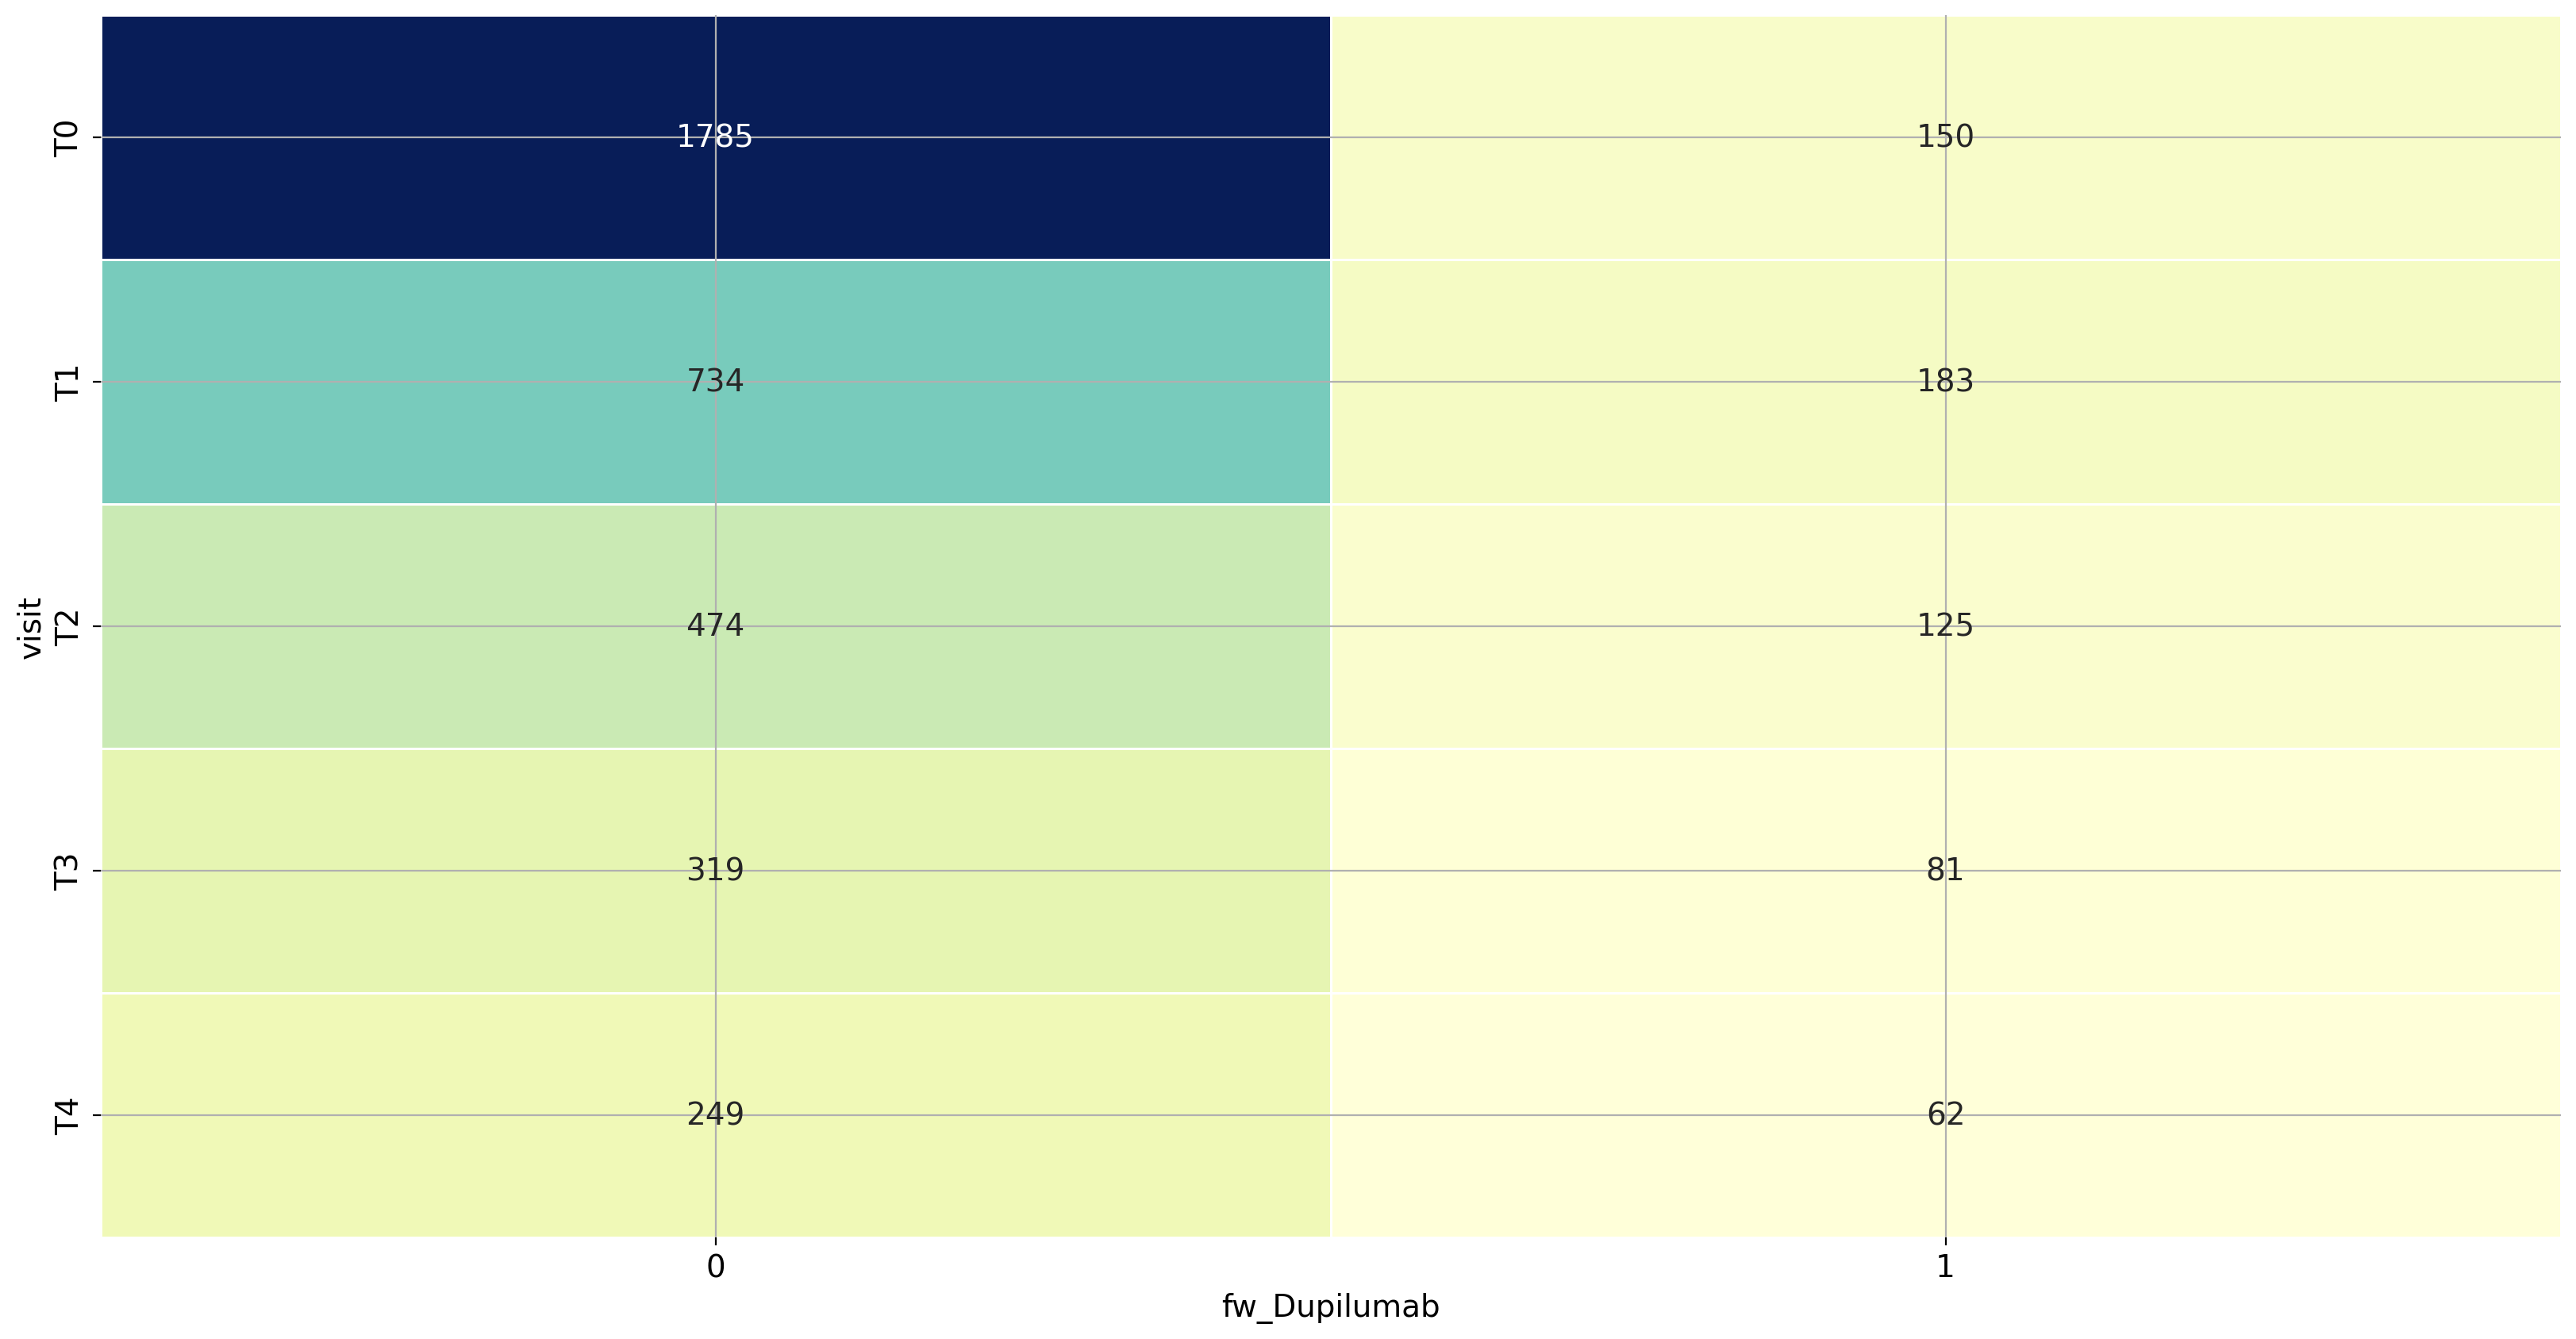

In [125]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches


DF_orig1 = DF_orig.loc[DF_orig.AD == 1]


sns.heatmap(pd.crosstab(DF_orig1['visit'],DF_orig1['fw_Dupilumab']),cmap="YlGnBu",
            annot=True, cbar=False,linewidths=.5, ax=ax,  fmt='.0f')
plt.show()

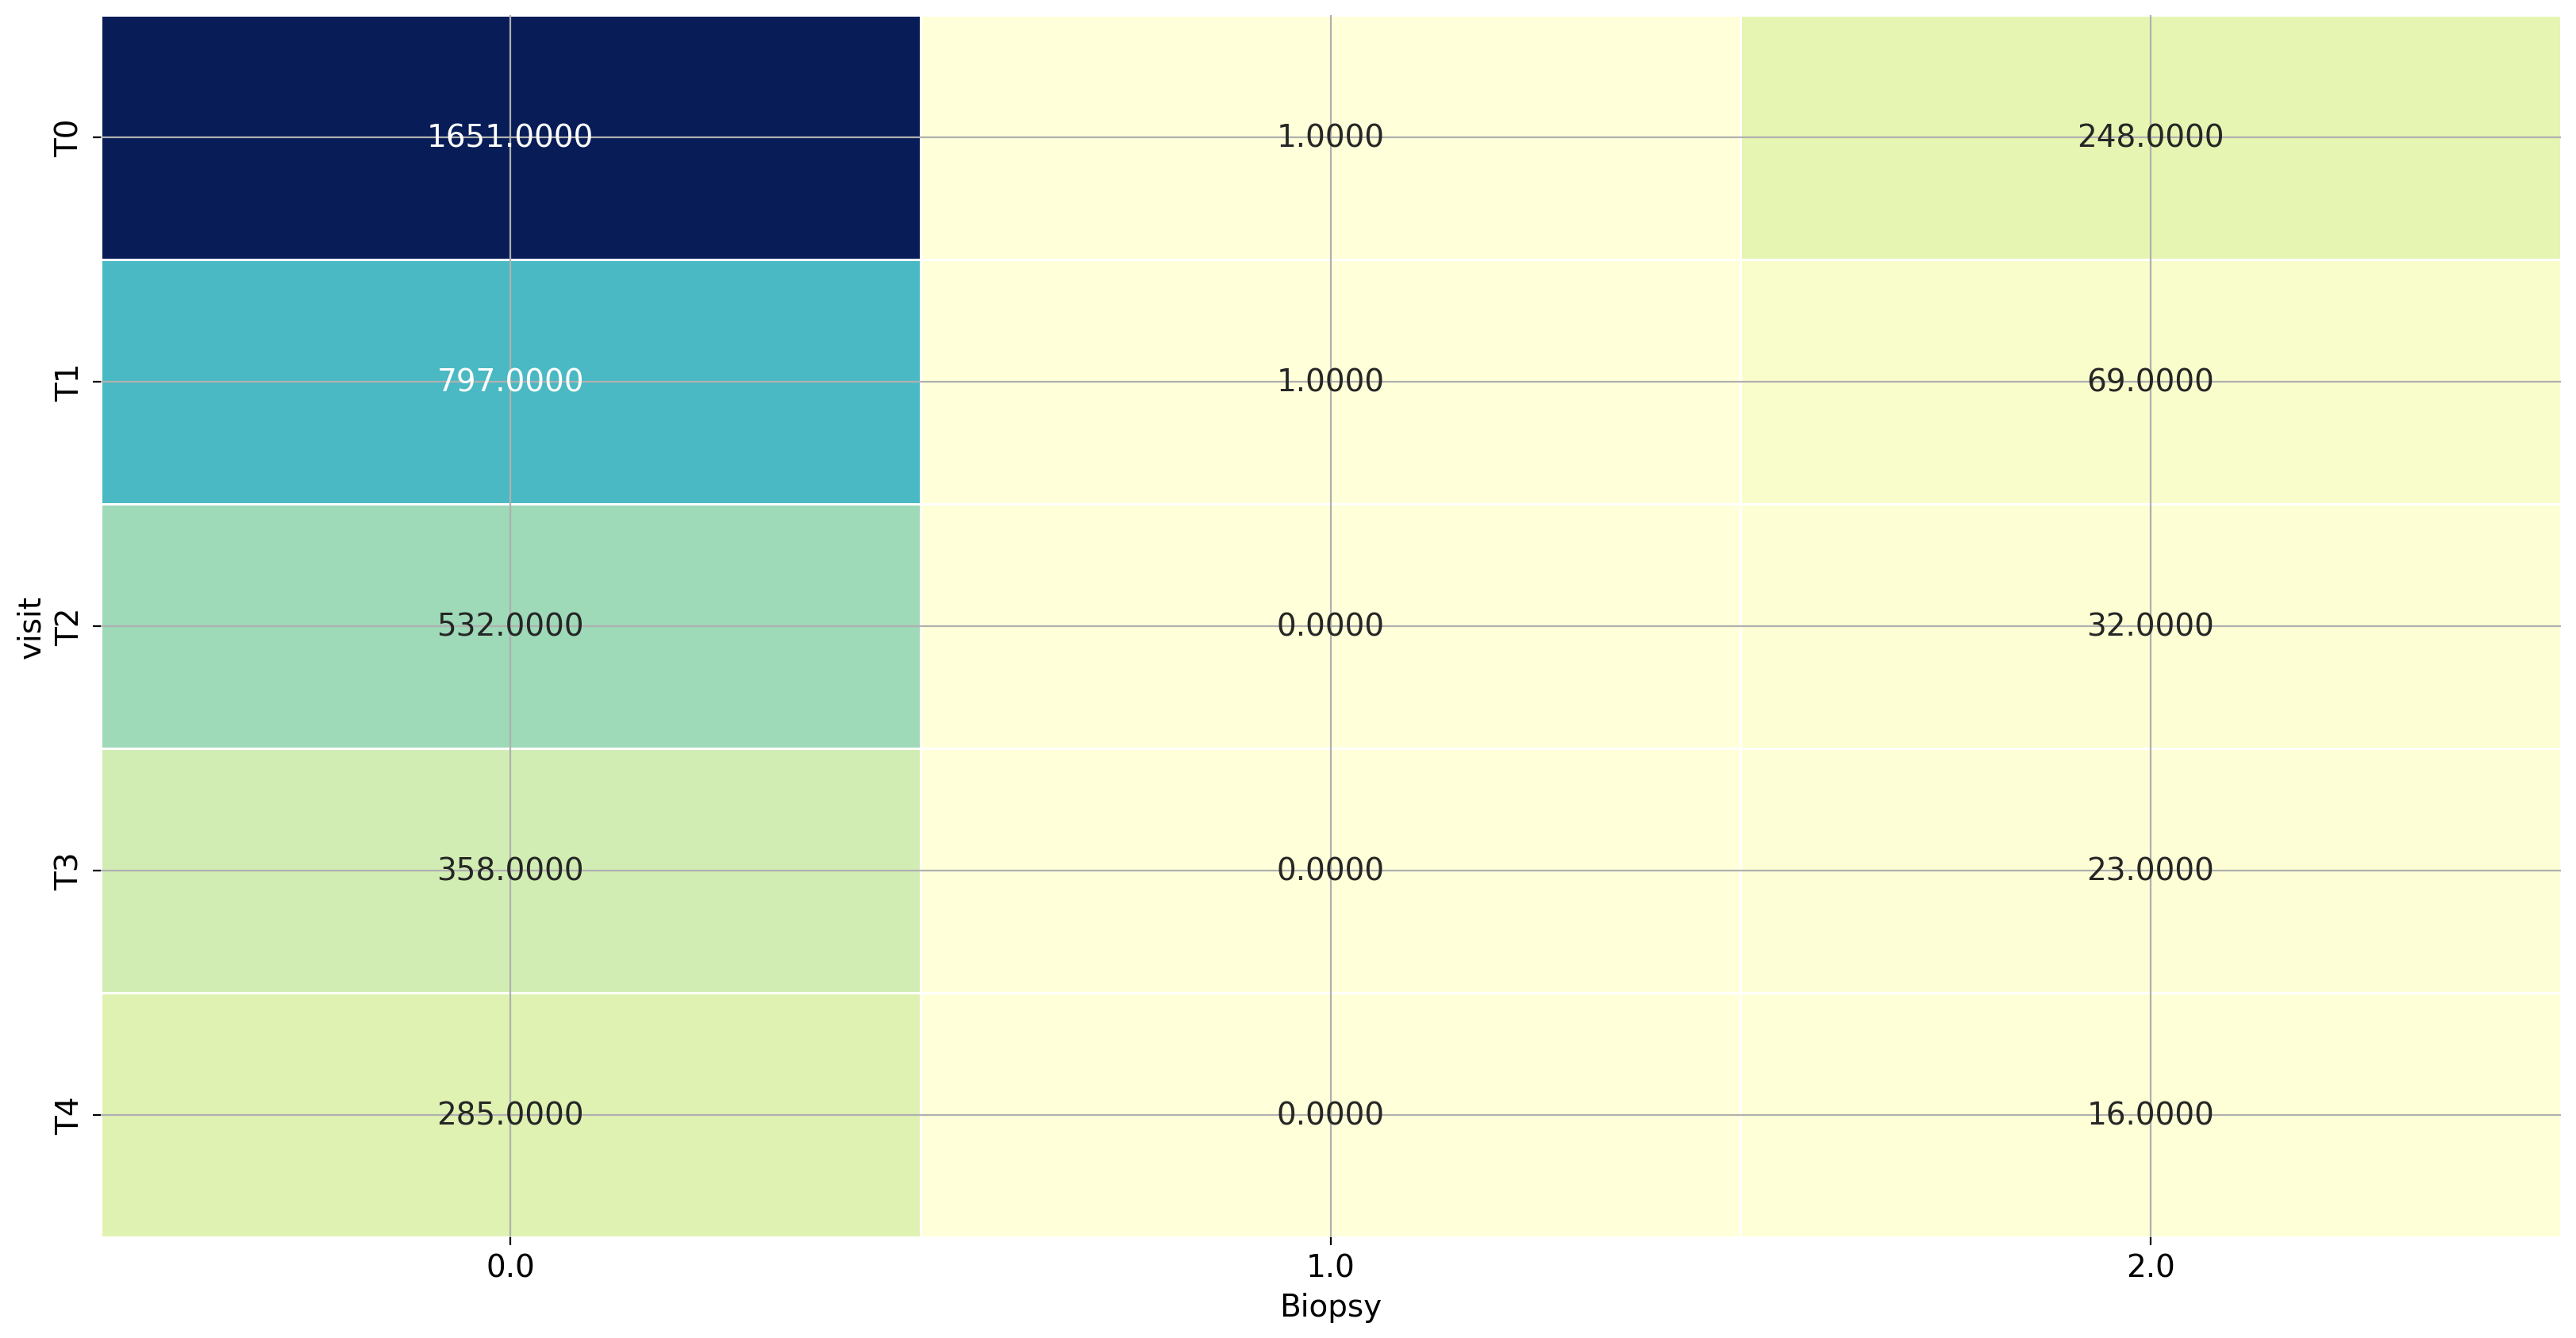

In [126]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches

sns.heatmap(pd.crosstab(DF_orig1['visit'],DF_orig1['Biopsy']),cmap="YlGnBu",
            annot=True, cbar=False,linewidths=.5, ax=ax,  fmt='.4f')
plt.show()


In [127]:
DF_orig.AD

0        1
1        1
2        1
3        1
4        1
        ..
13550    1
13551    0
13552    0
13553    0
13554    0
Name: AD, Length: 13555, dtype: int32

In [128]:
DF_orig.filter(regex = "fw_Dupilumab")

,fw_Dupilumab
0,0
1,0
2,0
3,0
4,0
...,...
13550,0
13551,0
13552,0
13553,0


In [129]:
DF_orig.filter(regex = "JAKSTAT").value_counts()

JAKSTAT
0          13420
1            135
Name: count, dtype: int64